# "Analisis Sentiment Masyarakat Terhadap Berita Timothy Ronald Dilaporkan Kepada Pihak Berwajib"

# 📑 DAFTAR ISI (NAVIGATION)

---

Klik link di bawah untuk lompat ke bab yang diinginkan:

* [**A. Business Understanding**](#bab-a)
    * *Latar Belakang, Rumusan Masalah, & Tujuan Penelitian*
* [**B. Data Understanding (Basic EDA)**](#bab-b)
    * *Cek Kesehatan Data, Distribusi Sentimen Awal, & Word Cloud*
* [**C. Data Cleaning**](#bab-c)
    * *Pembersihan Simbol, Angka, & Stopword Removal*
* [**D. Exploratory Data Analysis (Deep Dive)**](#bab-d)
    * *Advanced Insights: Zipf's Law, Emoji Analysis, & Semantic Network*
* [**E. Data Preprocessing (Final)**](#bab-e)
    * *Slang Normalization, **Sarcasm Handling (Rule-based)**, & TF-IDF*
* [**F. Modeling**](#bab-f)
    * *Training Naive Bayes Model*
* [**G. Evaluation**](#bab-g)
    * *Confusion Matrix, Classification Report, & **Manual ROC Curve***

---

<a id="bab-a"></a>
## A. Business Understanding

### 1. Latar Belakang
Perkembangan media sosial di era digital telah membuka ruang kebebasan berpendapat yang masif. Namun, kebebasan ini sering kali menjadi pedang bermata dua, di mana kritik sering kali bercampur dengan ujaran kebencian (*hate speech*). Fenomena ini terlihat jelas pada kasus pelaporan **Timothy Ronald**, seorang influencer *Crypto*, yang memicu polarisasi opini publik yang ekstrem di kolom komentar.

Namun, tantangan utama muncul dari sisi volume data. Ribuan komentar yang masuk setiap harinya menciptakan tumpukan informasi tak terstruktur (*unstructured data*) yang mustahil dianalisis secara manual. Pemrosesan manual tidak hanya memakan waktu (*time-consuming*), tetapi juga rentan terhadap bias subjektif manusia, sehingga sulit untuk mendapatkan gambaran objektif mengenai sentimen masyarakat yang sebenarnya.

Oleh karena itu, penerapan teknologi **Natural Language Processing (NLP)** menjadi solusi krusial. Melalui algoritma *Machine Learning*, kita dapat membangun sistem yang mampu mengklasifikasikan sentimen secara otomatis. Hal ini tidak hanya meningkatkan efisiensi analisis, tetapi juga membantu memisahkan opini publik yang valid dari sekadar ujaran kebencian.

---

### 2. Problem Statement
Berdasarkan latar belakang di atas, terdapat tiga masalah utama yang diidentifikasi:

* **Inefisiensi Pemrosesan Manual (*Operational Inefficiency*)** Lonjakan interaksi pada kolom komentar menghasilkan ribuan data teks dalam waktu singkat. Pemrosesan data secara manual tidak memiliki skalabilitas (*scalability*), sehingga membutuhkan sumber daya manusia dan waktu yang tidak proporsional untuk mendapatkan hasil analisis yang menyeluruh.

* **Bias Subjektivitas Manusia (*Subjective Bias*)** Isu yang melibatkan figur publik sering kali memicu polarisasi emosional yang kuat. Analisis manual rentan terhadap *cognitive bias* pengamat, di mana penilaian sentimen (Positif/Negatif) dapat terdistorsi oleh preferensi pribadi, menghasilkan kesimpulan yang tidak objektif.

* **Kompleksitas Data Tidak Terstruktur (*Unstructured Data Complexity*)** Mayoritas komentar ditulis menggunakan ragam bahasa non-baku, penuh dengan singkatan (*slang*), kesalahan ketik (*typo*), dan campuran kode (*code-mixing*). Tanpa tahap *preprocessing* dan *feature extraction* yang tepat, data mentah ini sulit diklasifikasikan dengan akurat oleh metode statistik konvensional.

---

### 3. Tujuan Penelitian
Penelitian ini bertujuan untuk menjawab permasalahan di atas melalui langkah-langkah berikut:

1.  **Implementasi Preprocessing Data Tidak Terstruktur** Menerapkan tahapan *text preprocessing* yang komprehensif (meliputi *cleansing*, *tokenization*, *stopword removal*, dan penanganan *slang*) untuk mengubah data komentar mentah yang penuh *noise* menjadi data terstruktur yang siap diolah oleh mesin.

2.  **Pengembangan Model Tanpa Library Black-Box** Membangun dan mengimplementasikan algoritma **Multinomial Naive Bayes** secara manual (*from scratch*) menggunakan bahasa pemrograman Python. Tujuannya adalah untuk memahami logika matematis dan probabilitas di balik algoritma tersebut tanpa ketergantungan pada *library* instan seperti Scikit-Learn.

3.  **Evaluasi Performa Model** Mengukur tingkat efektivitas model klasifikasi yang telah dibangun menggunakan metrik evaluasi standar (seperti *Accuracy*), guna mengetahui seberapa andal algoritma buatan sendiri dalam memprediksi sentimen masyarakat terhadap kasus Timothy Ronald.

<a id="bab-b"></a>
## B. Understanding dan Cleaning

### B.1 Import Library

In [87]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Library For NLP
import re
import nltk

from nltk.tokenize import word_tokenize # toneisasi
from nltk.corpus import stopwords

try:
 nltk.data.find('tokenizers/punkt')
except LookupError:
 print("Sedang Downaload NLTK")
 nltk.download('punkt')
 nltk.download('stopwords')
 print("Download Selesai")

### B.2 Read Data dan lihat 5 data terats 

In [88]:
try:
 df = pd.read_csv('Timothy.csv')
 print("Berhasil Membaaca Data")
except Exception as e:
 print("Gagal Membaca Data")

Berhasil Membaaca Data


### B.3 Melihat Informasi Data

In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5137 entries, 0 to 5136
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   User     5137 non-null   object
 1   Comment  5137 non-null   object
dtypes: object(2)
memory usage: 80.4+ KB


### B.4 Cek Dimensi Data

In [90]:
df.shape

(5137, 2)

### B.5 Cek Data Yang Hilang

In [91]:
msissing = df.isnull().sum()
msissing = msissing[msissing > 0]

In [92]:
msissing

Series([], dtype: int64)

In [93]:
df.isnull().sum()

User       0
Comment    0
dtype: int64

In [94]:
missing_val = df.isnull().mean() * 100
missing_val = missing_val[missing_val > 0].sort_values()

if not missing_val.empty:
 plt.figure(figsize=(10, 8))
 ax = missing_val.plot(kind='barh', color = 'tomato', zorder = 2)

 plt.title("Data Quality Check: Adakah Columns Missing Yang Melebihi Threshold?", fontsize = 14, fontweight = "bold", loc = 'left')
 plt.xlabel("Presentase Data Hilang (%)")
 plt.axvline(x = 50, color = 'black', linestyle = '--', alpha = 0.5)
 plt.text(52, 0, 'Batas Toleransi Kehilangan (50%)', color = 'black', va = 'center')
 plt.grid(axis = 'x', linestyle = '--', alpha = 0.3)

 plt.show()
else:
 print("Datanya Udah bener2 bersih")

Datanya Udah bener2 bersih


### B.6 Cek Duplikasi Data

In [95]:
df['User'].duplicated().sum()

np.int64(359)

In [96]:
df['Comment'].duplicated().sum()

np.int64(55)

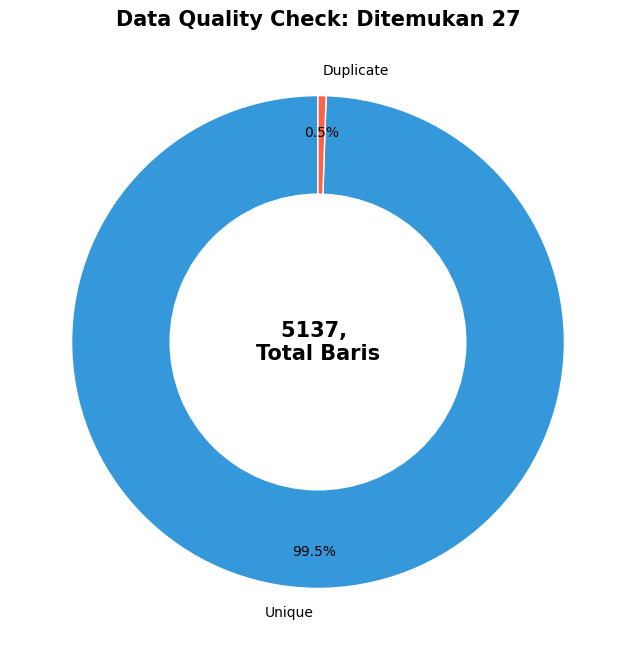

In [97]:
n_dup = df.duplicated().sum()
sizes = [len(df) - n_dup, n_dup]

plt.figure(figsize = (10, 8))
color = ['#3498db', 'tomato']

plt.pie(sizes, labels=['Unique', 'Duplicate'], colors = color, autopct='%1.1f%%',
        startangle = 90, pctdistance = 0.85, wedgeprops={'width': 0.4, 'edgecolor': 'white'})
plt.text(0, 0, f"{len(df):}, \nTotal Baris", ha = 'center', va = 'center', fontsize = 15, fontweight = 'bold')
plt.title(f"Data Quality Check: Ditemukan {n_dup}", fontsize  = 15, fontweight = 'bold')

plt.show()

### B.7 Overview Data 

In [98]:
def check_data_health(df):
    # Kita bikin list kosong buat nampung laporan
    data_report = []
    
    # Loop ke setiap kolom 
    for col in df.columns:
        # 1. Hitung Missing Values
        missing = df[col].isnull().sum()
        missing_pct = (missing / len(df)) * 100
        
        # 2. Hitung Duplikat
        # 
        duplicates = df[col].duplicated().sum()
        
        # 3. Hitung Data Unik 
        unique = df[col].nunique()
        
        # Masukin ke laporan
        data_report.append([col, missing, f"{missing_pct:.1f}%", duplicates, unique])
    
    # Bikin jadi DataFrame
    report_df = pd.DataFrame(data_report, columns=['Column', 'Missing', 'Missing (%)', 'Duplicates (in Col)', 'Unique Values'])
    
    return report_df

#check
laporan = check_data_health(df)
print(laporan)

    Column  Missing Missing (%)  Duplicates (in Col)  Unique Values
0     User        0        0.0%                  359           4778
1  Comment        0        0.0%                   55           5082


<a id="bab-c"></a>
## C. Data Preparation

### C.1 Handling Duplicates

In [99]:
# cek data awal
print(f"Jumlah Data Awal {len(df)}")

# drop duplicates
df.drop_duplicates(subset=['User', 'Comment'], keep = 'first', inplace=True)

# reset index agar rapih
df.reset_index(drop=True, inplace=True)

print(f"Junlah Data setelah Di drop duplicates: {len(df)}")

Jumlah Data Awal 5137
Junlah Data setelah Di drop duplicates: 5110


### C.2 Check Distribution Data

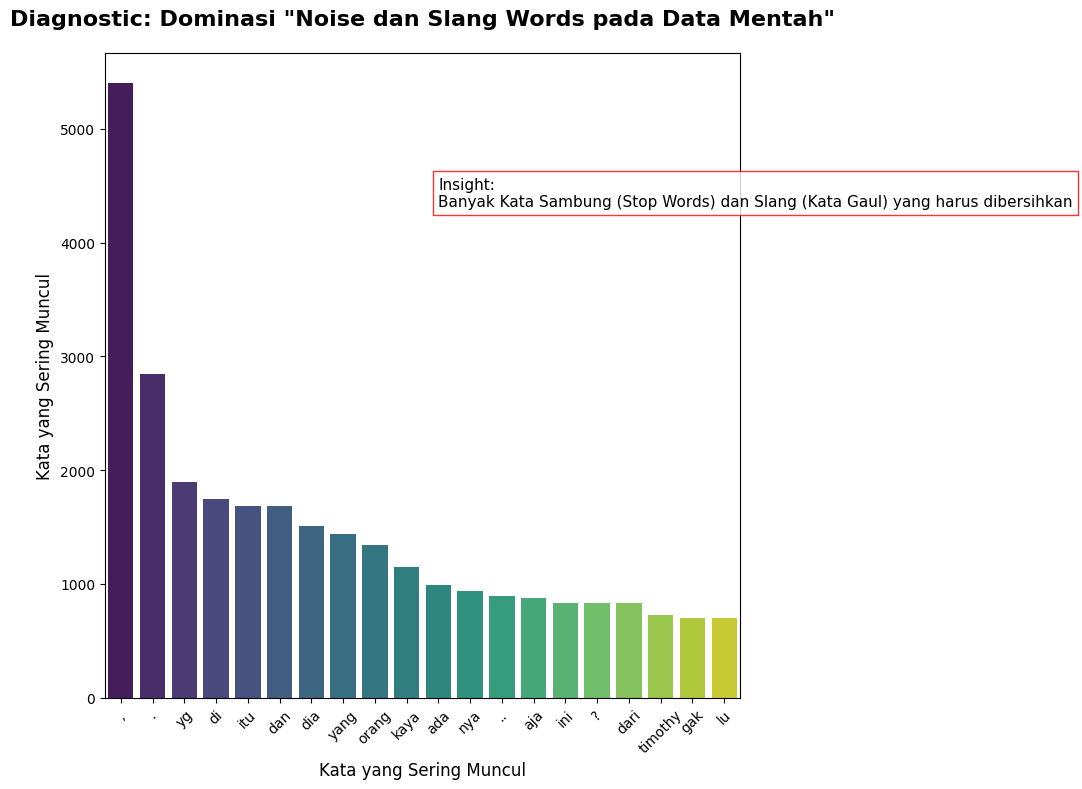

tOP 20 Kata Terbanyak
,: 5398
.: 2842
yg: 1892
di: 1750
itu: 1685
dan: 1682
dia: 1507
yang: 1442
orang: 1339
kaya: 1146
ada: 988
nya: 938
..: 897
aja: 876
ini: 835
?: 834
dari: 831
timothy: 730
gak: 700
lu: 700


In [100]:
# gabungin semua komentar
all_text = ' '.join(df['Comment'].astype(str))
tokens = word_tokenize(all_text.lower())

# buat dictionary kosong
word_freq = {}

# looping
for word in tokens:
 if word in word_freq:
  word_freq[word] += 1
 else:
  word_freq[word] = 1

# sorting 
sorted_freq  = sorted(word_freq.items(), key = lambda item: item[1], reverse = True)

# Ambil 20 Kata Teratas
top_words = sorted_freq[:20]

# pisahkan angka plotting
words = [item[0] for item in top_words]
counts = [item[1] for item in top_words]

# plotting
plt.figure(figsize=(10, 8))
sns.barplot(x = words, y = counts, palette= 'viridis', hue = words ,legend = False)

# judul
plt.title('Diagnostic: Dominasi "Noise dan Slang Words pada Data Mentah"', 
          fontsize = 16, fontweight = 'bold', pad = 20)

plt.xlabel("Kata yang Sering Muncul", fontsize = 12)
plt.ylabel("Kata yang Sering Muncul", fontsize = 12)

plt.text(x = 10, y = max(counts)*0.8, 
         s ='Insight:\nBanyak Kata Sambung (Stop Words) dan Slang (Kata Gaul) yang harus dibersihkan',
         fontsize =11, bbox = dict(facecolor = 'white', alpha = 0.8, edgecolor = 'red'))

plt.xticks(rotation = 45)
plt.tight_layout()
plt.show()

print("tOP 20 Kata Terbanyak")
for w, c in top_words[:20]:
 print(f"{w}: {c}")

### C.3 Text Processing

### Text Normalization

In [101]:
# Text Normalization
print("----- Memulai Proses Text Normalization -----")

# Kamus Slang
norm_dict = {
    'yg': 'yang',    
    'aja': 'saja',   
    'gak': 'tidak',  
    'lu': 'kamu',
}

# FUNGSI NORMALISASI 
def normalisasi_slang(text):
    # a. Pastikan text lowercase (biar 'YG' tetap kena detect 'yg')
    text = str(text).lower()
    
    # b. Pecah kalimat jadi kata-kata (Split)
    words = text.split()
    
    # c. Cek kamus: Kalau ada ganti, kalau gak ada biarin
    normalized_words = [norm_dict.get(word, word) for word in words]
    
    # d. Gabung lagi jadi kalimat
    return ' '.join(normalized_words)

# EKSEKUSI KE DATA 
#  kolom baru sementara buat ngecek hasil
df['Normalized_Check'] = df['Comment'].apply(normalisasi_slang)

print("✅ Berhasil Melakukan Normalization!")

# CEK HASIL
print("\n----- Contoh Perubahan (Before vs After) -----")

# Filter: Tampilkan hanya data yang mengandung kata 'yg' atau 'gak' biar keliatan bedanya
sample_perubahan = df[df['Comment'].str.contains('yg|gak|lu', case=False, na=False)].head(5)

# Tampilkan 
print(sample_perubahan[['Comment', 'Normalized_Check']])

----- Memulai Proses Text Normalization -----
✅ Berhasil Melakukan Normalization!

----- Contoh Perubahan (Before vs After) -----
                                              Comment  \
0   Ini kamar jeri gemana sih,klw jadi konten krea...   
6                   Yang konglomerat aja gak flexing.   
7   Menurutku sih. Edukasi nya bgus boleh ditiru k...   
8   Pola ini sudah pernah di lakukan di tahun2 seb...   
12  pppffffff... contoh kalo orang udah dikasih ka...   

                                     Normalized_Check  
0   ini kamar jeri gemana sih,klw jadi konten krea...  
6                yang konglomerat saja tidak flexing.  
7   menurutku sih. edukasi nya bgus boleh ditiru k...  
8   pola ini sudah pernah di lakukan di tahun2 seb...  
12  pppffffff... contoh kalo orang udah dikasih ka...  


### Stopwords Removal

In [102]:
list_stopwords = set(stopwords.words('indonesian'))
list_stopwords.discard('tidak')
list_stopwords.discard('bukan') 
list_stopwords.update(['sih', 'dong', 'kok', 'tuh', 'nih'])

### Cleaning Text 

In [103]:
def clean_text(text):
    text = str(text).lower()                 # Huruf kecil
    text = re.sub(r'[^a-z\s]', ' ', text)    # Hapus simbol (.,?!) & angka
    text = normalisasi_slang(text)           # Ganti slang (yg -> yang)
    text = re.sub(r'\s+', ' ', text).strip() # Hapus spasi dobel
    
    tokens = word_tokenize(text)             # Potong kata
    tokens_bersih = [t for t in tokens if t not in list_stopwords] # Buang stopwords
    
    return ' '.join(tokens_bersih)

# EKSEKUSI 
print("Sedang membersihkan data... ")
df['Clean_Comment'] = df['Comment'].apply(clean_text)

# Remove NaN Data
df['Clean_Comment'].replace('', np.nan)
df.dropna(subset=['Clean_Comment'], inplace=True)
df.reset_index(drop=True, inplace=True)

print(f"Selesai! Data bersih siap pakai. Total sisa data: {len(df)}")
print("\nContoh Hasil:")
print(df[['Comment', 'Clean_Comment']].head(10))

Sedang membersihkan data... 
Selesai! Data bersih siap pakai. Total sisa data: 5110

Contoh Hasil:
                                             Comment  \
0  Ini kamar jeri gemana sih,klw jadi konten krea...   
1                      SUDAH KUDUGA SI BACOT TIMOTHY   
2  Logika mana orang kaya ngajak untuk orang lain...   
3                                       timothy boty   
4        Skyholic adalah Kamar Jeri.\nSe simple itu!   
5  Hikmah nya buat generasi muda jangan mudah per...   
6                  Yang konglomerat aja gak flexing.   
7  Menurutku sih. Edukasi nya bgus boleh ditiru k...   
8  Pola ini sudah pernah di lakukan di tahun2 seb...   
9                Makin kurus an bang?sakit kah bang?   

                                       Clean_Comment  
0  kamar jeri gemana klw konten kreator ga salah ...  
1                            kuduga si bacot timothy  
2  logika orang kaya ngajak orang kaya tingkat ke...  
3                                       timothy boty  
4        

<a id="bab-d"></a>
## D. Eksplorasi Data Analysis (EDA)

### D.1 WordCloud Visualization

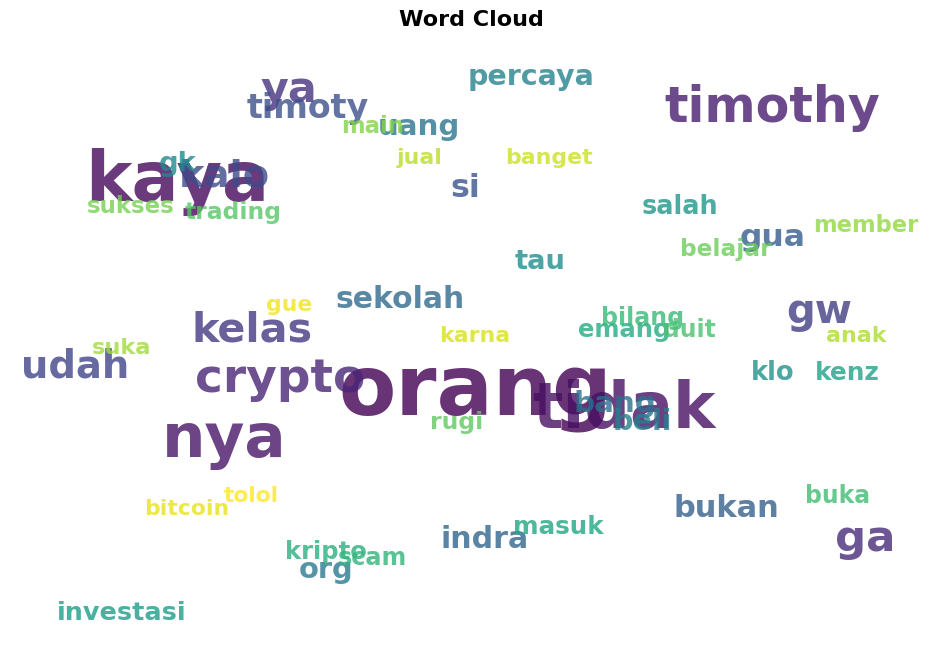

In [104]:
top_words = pd.Series(' '.join(df['Clean_Comment']).split()).value_counts().head(50)

# SETUP PLOT
plt.figure(figsize=(12, 8))
plt.axis('off')
plt.title('Word Cloud ', fontsize=16, fontweight='bold')

# Bikin warna gradasi otomatis 
colors = plt.cm.viridis(np.linspace(0, 1, len(top_words)))

# LOOP PLOTTING 
max_freq = top_words.iloc[0]

# zip() biar kita loop, frekuensi, dan warnanya barengan
for (word, freq), color in zip(top_words.items(), colors):
    
    # Hitung ukuran font
    size = (freq / max_freq) * 50 + 10
    
    # Generate posisi X, Y acak pake Numpy 
    x, y = np.random.randint(5, 95, 2)
    
    # Plot Teks
    plt.text(x, y, word, 
             fontsize=size, 
             color=color, 
             ha='center', va='center', 
             alpha=0.8, fontweight='bold')

plt.xlim(0, 100)
plt.ylim(0, 100)
plt.show()

### D. 2 Feature Extraction (TF - IDF)

### Persiapan Corpus

In [105]:
corpus = df['Clean_Comment'].apply(lambda x: str(x).split()).tolist()
N = len(corpus)

###  Hitung TF

In [106]:
tf_data = []  # List 

for doc in corpus:
    len_doc = len(doc)
    doc_tf = {}  # Wadah per dokumen 
    
    # Cuma hitung kalau ada isinya
    if len_doc > 0:
        word_freq = {}
        for w in doc:
            word_freq[w] = word_freq.get(w, 0) + 1
        
        for word, freq in word_freq.items():
            doc_tf[word] = freq / len_doc
    
    # Append agar jumlah tf_data sama persis dengan jumlah corpus (N)
    tf_data.append(doc_tf)

### Hitung DF

In [107]:
df_counts = {}

for doc in corpus:
    # Pake unique biar kata yg muncul 2x di 1 dokumen tetep dihitung 1
    unique_words = np.unique(doc) 
    for word in unique_words:
        df_counts[word] = df_counts.get(word, 0) + 1

# Hitung Nilai IDF
idf_dict = {}
for word, count in df_counts.items():
    # Pake log10 dan smoothing (+1)
    idf_dict[word] = np.log10(N / (count + 1))

### Hitung TF - IDF

In [108]:
tfidf_data = [] # List hasil akhir
keyword_scores = {} #  akumulasi visualisasi nanti

# Loop setiap dokumen lagi
for i in range(N):
    doc_tfidf = {}
    
    # Ambil TF dokumen ke-i 
    current_tf = tf_data[i]
    
    for word, tf_val in current_tf.items():
        # Ambil IDF kata tersebut 
        idf_val = idf_dict.get(word, 0)
        
        # KALIIN (TF * IDF)
        score = tf_val * idf_val
        
        # Simpan
        doc_tfidf[word] = score
        
        # Akumulasi Visualisasi 
        keyword_scores[word] = keyword_scores.get(word, 0) + score
        
    tfidf_data.append(doc_tfidf)

### Visualisasi TF - IDF

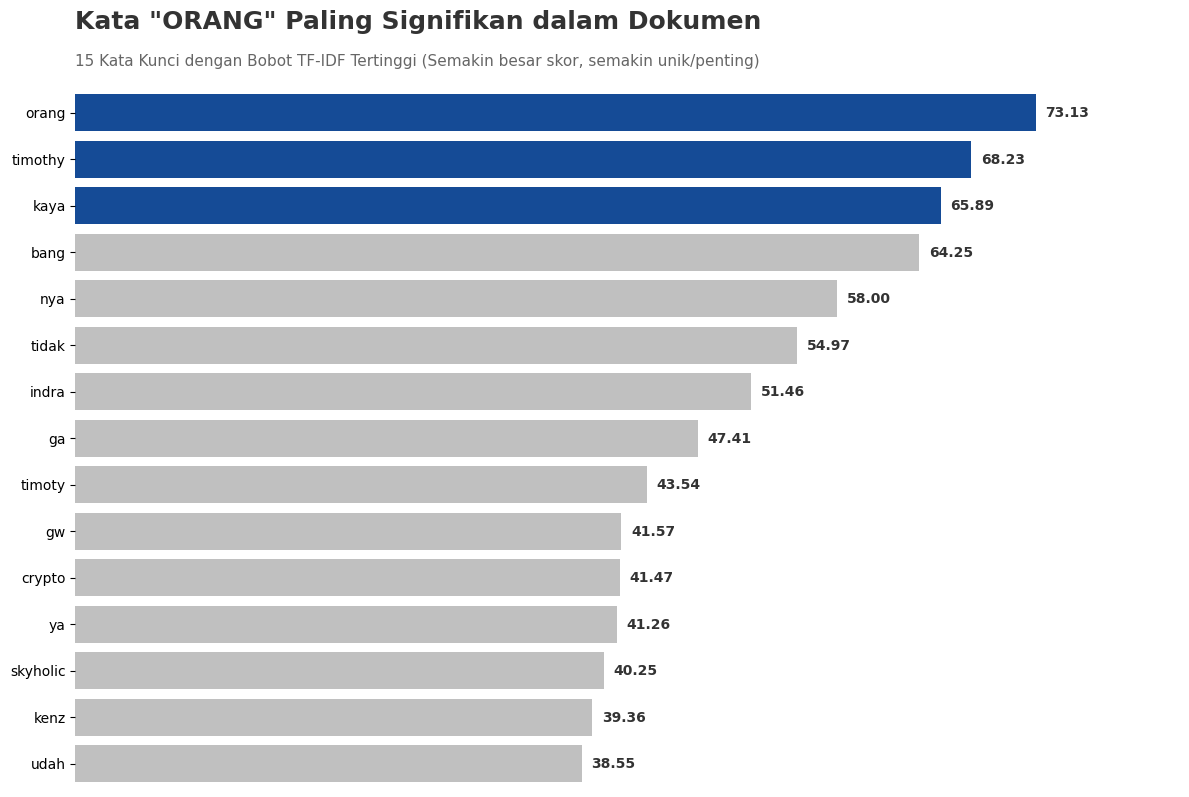

In [109]:
sorted_keywords = sorted(keyword_scores.items(), key=lambda x: x[1], reverse=True)

# Slice
plot_keywords = sorted_keywords[:15] 

# Pisahin Kata (Words) dan Skor (Scores) buat sumbu X dan Y
words = [x[0] for x in plot_keywords]
scores = [x[1] for x in plot_keywords]


# LANJUT VISUALISASI (KODE LO YANG TADI)
plt.figure(figsize=(12, 8))

# Style
colors = ['#C0C0C0'] * len(words) 
for i in range(3): 
    colors[i] = '#0047AB' 

# PLOT HORIZONTAL 
ax = sns.barplot(x=scores, y=words, palette=colors, hue=words, legend=False)

# STORYTELLING TITLE
top_word = words[0].upper()
plt.text(x=0, y=-1.8, 
         s=f'Kata "{top_word}" Paling Signifikan dalam Dokumen', 
         fontsize=18, fontweight='bold', color='#333333')
plt.text(x=0, y=-1.0, 
         s='15 Kata Kunci dengan Bobot TF-IDF Tertinggi (Semakin besar skor, semakin unik/penting)', 
         fontsize=11, color='#666666')

#  CLEAN UP 
sns.despine(left=True, bottom=True)
plt.xlabel(None) 
plt.ylabel(None) 
plt.xticks([])   

#  DIRECT LABELING 
max_score = max(scores)
plt.xlim(0, max_score * 1.15) 

for i, v in enumerate(scores):
    ax.text(v + (max_score * 0.01), i + 0.1, f"{v:.2f}", 
            color='#333333', fontweight='bold', fontsize=10)

plt.tight_layout()
plt.show()

### D.3 N_Gram Analysis

### Hitung N_Gram

In [110]:
# Fungsi Bigram 
def generate_bigrams(text_list):
    bigram_list = []
    for text in text_list:
        words = str(text).split() # Tambahin str() biar aman kalo ada data float/NaN
        if len(words) > 1:
            for i in range(len(words) - 1):
                bigram_list.append(words[i] + " " + words[i+1])
    return bigram_list

# Eksekusi (Pastikan df['Clean_Comment'] udah ada di cell sebelumnya)
all_bigrams = generate_bigrams(df['Clean_Comment'])

# Hitung Frekuensi 
bigram_counts = {}
for bi in all_bigrams:
    bigram_counts[bi] = bigram_counts.get(bi, 0) + 1

# Sorting
# Lo ambil Top 20 di sini (biar punya cadangan data)
sorted_bigrams = sorted(bigram_counts.items(), key=lambda x: x[1], reverse=True)[:20]

bi_words = [x[0] for x in sorted_bigrams]
bi_counts = [x[1] for x in sorted_bigrams]

### Visualisasi N_Gram

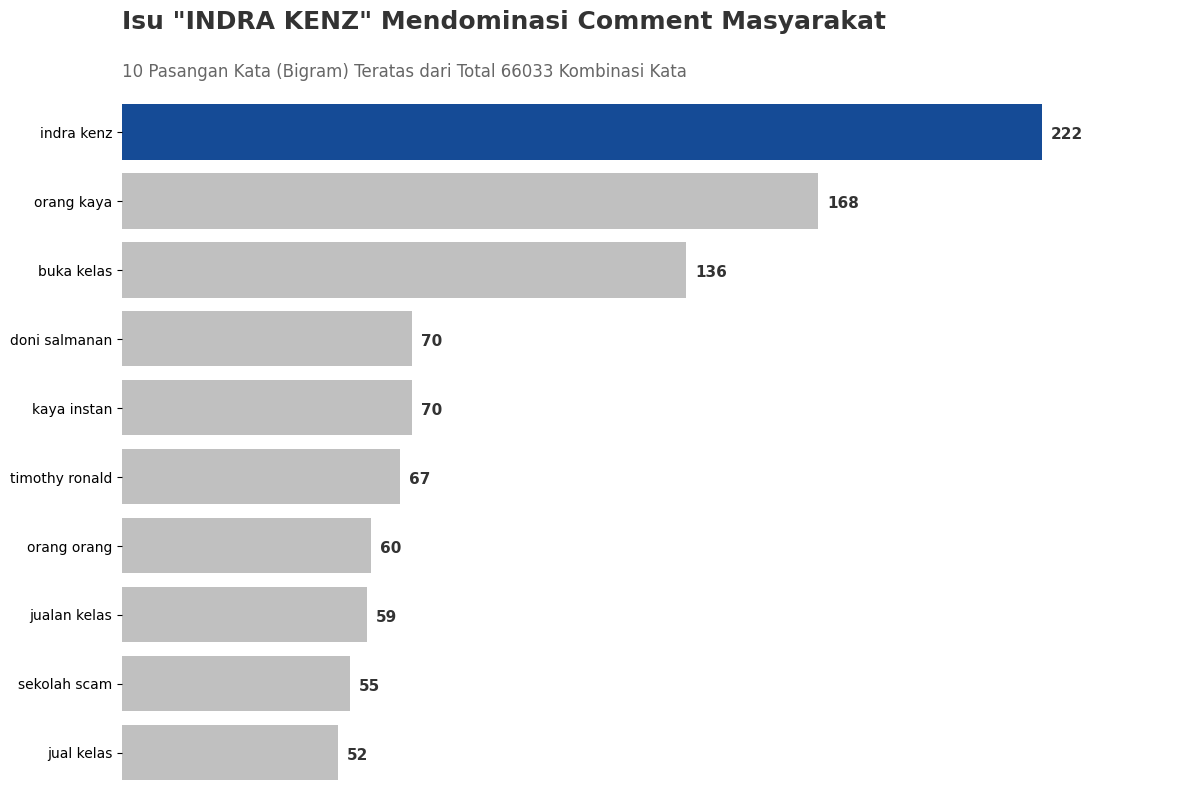

In [111]:
# Slicing: Kita ambil Top 10 aja untuk Plotting biar gak Clutter (Bab 3)
plot_words = bi_words[:10]
plot_counts = bi_counts[:10]

plt.figure(figsize=(12, 8))

# 1. STRATEGIC HIGHLIGHTING (Chapter 4)
colors = ['#C0C0C0'] * len(plot_words) # Abu-abu terang (Context)
colors[0] = '#0047AB' # Biru Cobalt (Fokus Utama)

# 2. PLOT
ax = sns.barplot(x=plot_counts, y=plot_words, palette=colors, hue=plot_words, legend=False)

# 3. DYNAMIC TITLE (Otomatis Deteksi Masalah)
# Ini ngambil kata pertama dari data lo, jadi judulnya selalu akurat
top_issue = plot_words[0].upper()
plt.text(x=0, y=-1.5, 
         s=f'Isu "{top_issue}" Mendominasi Comment Masyarakat', 
         fontsize=18, fontweight='bold', color='#333333')

plt.text(x=0, y=-0.8, 
         s=f'10 Pasangan Kata (Bigram) Teratas dari Total {len(all_bigrams)} Kombinasi Kata', 
         fontsize=12, color='#666666')

# 4. DE-CLUTTERING (Chapter 3)
sns.despine(left=True, bottom=True)
plt.ylabel(None)
plt.xlabel(None)
plt.xticks([])

# 5. DIRECT LABELING (Chapter 4)
# Kasih napas di kanan biar angka gak kepotong
max_val = max(plot_counts)
plt.xlim(0, max_val * 1.15) 

for i, v in enumerate(plot_counts):
    ax.text(v + (max_val * 0.01), i + 0.1, str(v), 
            color='#333333', fontweight='bold', fontsize=11)

plt.tight_layout()
plt.show()

### D.4 Word Co Occurance

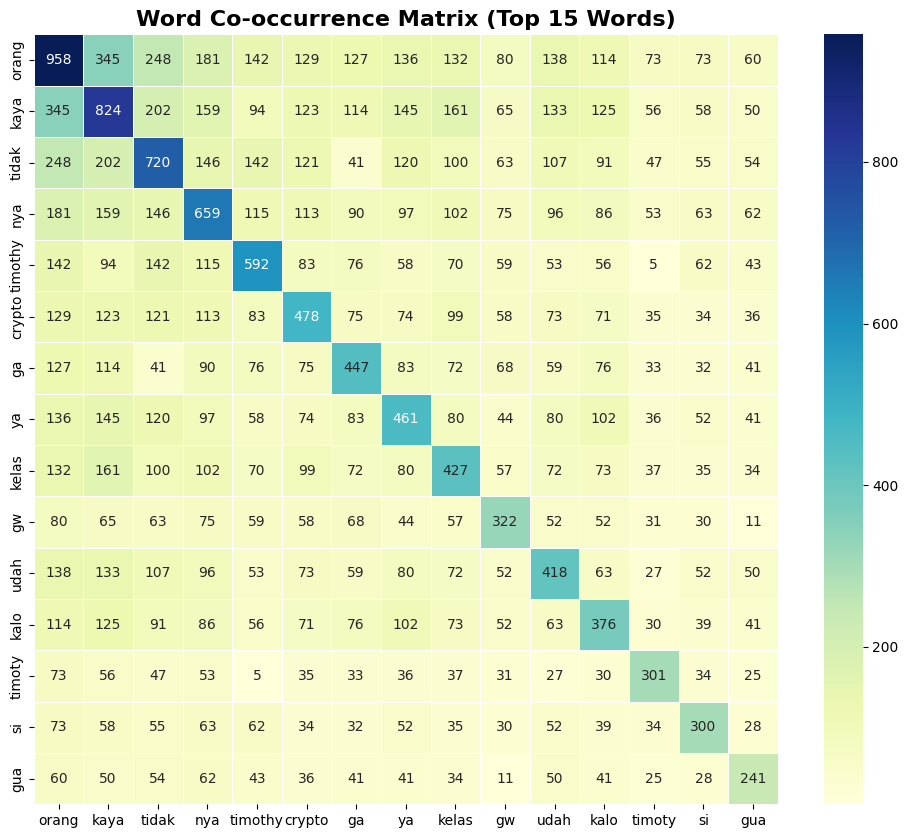

In [112]:
# TENTUKAN TOP WORDS 
top_n = 15
all_words = ' '.join(df['Clean_Comment']).split()
top_words_list = [word for word, count in pd.Series(all_words).value_counts().head(top_n).items()]

# BIKIN MATRIKS KOSONG (15 x 15)
co_occurrence_matrix = pd.DataFrame(0, index=top_words_list, columns=top_words_list)

# 3. ISI MATRIKS 
# Logika: Cek setiap komentar, kalau ada kata A dan kata B bareng, nilai +1
for doc in df['Clean_Comment']:
    tokens = set(str(doc).split()) # set biar pencarian cepet & unik
    
    # Loop untuk setiap pasangan kata top words
    for w1 in top_words_list:
        if w1 in tokens:
            for w2 in top_words_list:
                if w2 in tokens:
                    co_occurrence_matrix.loc[w1, w2] += 1

# 4. VISUALISASI HEATMAP
plt.figure(figsize=(12, 10))
sns.heatmap(co_occurrence_matrix, annot=True, fmt='d', cmap='YlGnBu', linewidths=.5)

plt.title(f'Word Co-occurrence Matrix (Top {top_n} Words)', fontsize=16, fontweight='bold')
plt.show()

### D.5 Word Distribution

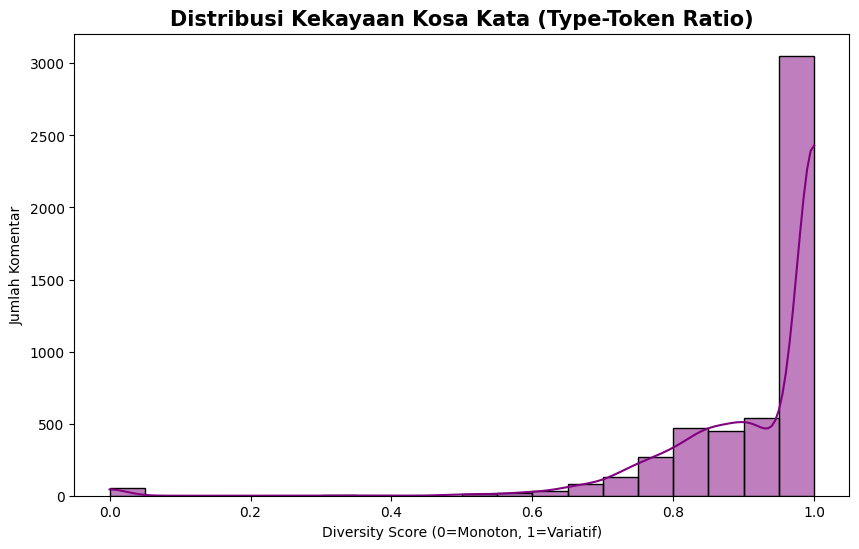

Rata-rata Lexical Diversity: 0.92


In [113]:
def calculate_ttr(text):
    words = str(text).split()
    if len(words) == 0:
        return 0
    unique_words = len(set(words))
    total_words = len(words)
    return unique_words / total_words # Type-Token Ratio (TTR)

# Hitung TTR per dokumen
df['Lexical_Diversity'] = df['Clean_Comment'].apply(calculate_ttr)

# Visualisasi
plt.figure(figsize=(10, 6))
sns.histplot(df['Lexical_Diversity'], bins=20, color='purple', kde=True)
plt.title('Distribusi Kekayaan Kosa Kata (Type-Token Ratio)', fontsize=15, fontweight='bold')
plt.xlabel('Diversity Score (0=Monoton, 1=Variatif)')
plt.ylabel('Jumlah Komentar')
plt.show()

print(f"Rata-rata Lexical Diversity: {df['Lexical_Diversity'].mean():.2f}")

### D.6 Zipfs Law PLot

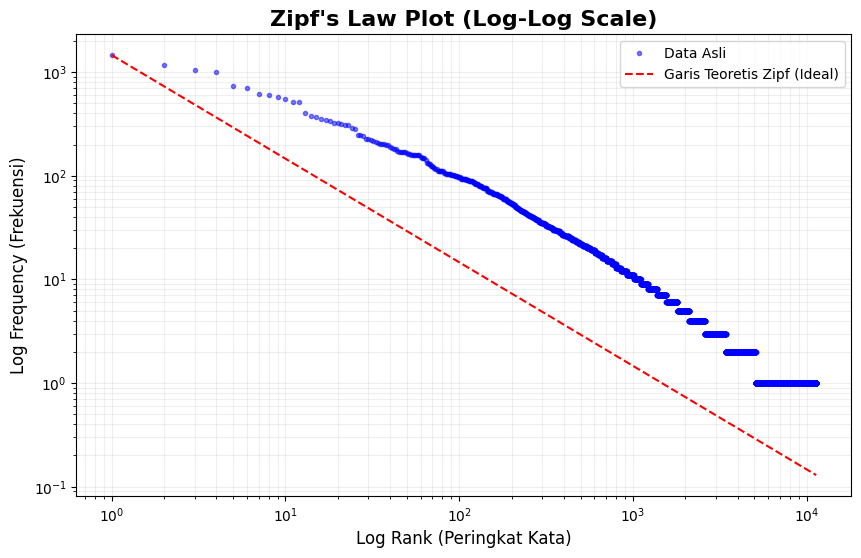

✅ Analisis Zipf Selesai! Garis lurus turun = Data Natural.


In [114]:
# Gabung semua text -> Split -> Masukin ke Series -> value_counts()
all_text_series = pd.Series(' '.join(df['Clean_Comment'].astype(str)).split())
word_counts_series = all_text_series.value_counts()

# 2. Ambil Data Ranking
sorted_counts = word_counts_series.values
ranks = np.arange(1, len(sorted_counts) + 1)

# 3. PLOTTING
plt.figure(figsize=(10, 6))

# Plot Data Asli
plt.loglog(ranks, sorted_counts, marker='.', linestyle='none', 
           color='blue', alpha=0.5, label='Data Asli')

# Plot Garis Ideal Zipf (Frekuensi ~ 1/Rank)
ideal_zipf = sorted_counts[0] / ranks
plt.loglog(ranks, ideal_zipf, 'r--', label='Garis Teoretis Zipf (Ideal)')

plt.title("Zipf's Law Plot (Log-Log Scale)", fontsize=16, fontweight='bold')
plt.xlabel('Log Rank (Peringkat Kata)', fontsize=12)
plt.ylabel('Log Frequency (Frekuensi)', fontsize=12)
plt.legend()
plt.grid(True, which="both", ls="-", alpha=0.2)
plt.show()

print("✅ Analisis Zipf Selesai! Garis lurus turun = Data Natural.")

### D.7 Latent Semanctic Analysis

In [115]:
# Gabung semua teks & Cari Top 100 Kata pakai Pandas
all_text_list = ' '.join(df['Clean_Comment'].astype(str)).split()
top_vocab = pd.Series(all_text_list).value_counts().head(100).index.tolist()

# Bangun Matriks 
dtm = []
for doc in df['Clean_Comment']:
    tokens = str(doc).split()
    # Hitung berapa kali setiap kata di top_vocab muncul di dokumen ini
    row = [tokens.count(w) for w in top_vocab]
    dtm.append(row)

X = np.array(dtm) # Ubah jadi Numpy Array
print(f"Ukuran Matriks: {X.shape} (Dokumen x 100 Kata)")


# X = U * Sigma * VT
# Kita cuma butuh VT (V-Transpose) buat liat hubungan Topik vs Kata
U, Sigma, VT = np.linalg.svd(X, full_matrices=False)

# C. LIHAT HASIL TOPIK
num_topics = 3 # Kita cari 3 topik utama
vocab_array = np.array(top_vocab) # Ubah list ke array biar bisa slicing enak

print(f"\n--- {num_topics} TOPIK UTAMA YANG DITEMUKAN MESIN ---")
for i in range(num_topics):
    # Ambil vektor baris ke-i dari VT
    topic_vector = VT[i]
    
    # Ambil indeks kata dengan bobot terbesar (Top 10)
    # argsort: urutin index dari nilai terkecil ke terbesar
    # [::-1]: balik urutannya biar jadi terbesar ke terkecil
    top_indices = topic_vector.argsort()[-10:][::-1]
    
    top_words_topic = vocab_array[top_indices]
    
    print(f"\nTopik #{i+1}:")
    print(", ".join(top_words_topic))

Ukuran Matriks: (5110, 100) (Dokumen x 100 Kata)

--- 3 TOPIK UTAMA YANG DITEMUKAN MESIN ---

Topik #1:
doni, bahas, mending, nonton, sombong, timoti, kena, judi, skyholic, dah

Topik #2:
gw, nya, ya, ga, klo, crypto, timothy, org, kelas, d

Topik #3:
kaya, gw, ga, ya, orang, crypto, kelas, org, klo, duit


### D.7 STYLOMETRIC ANALYSIS

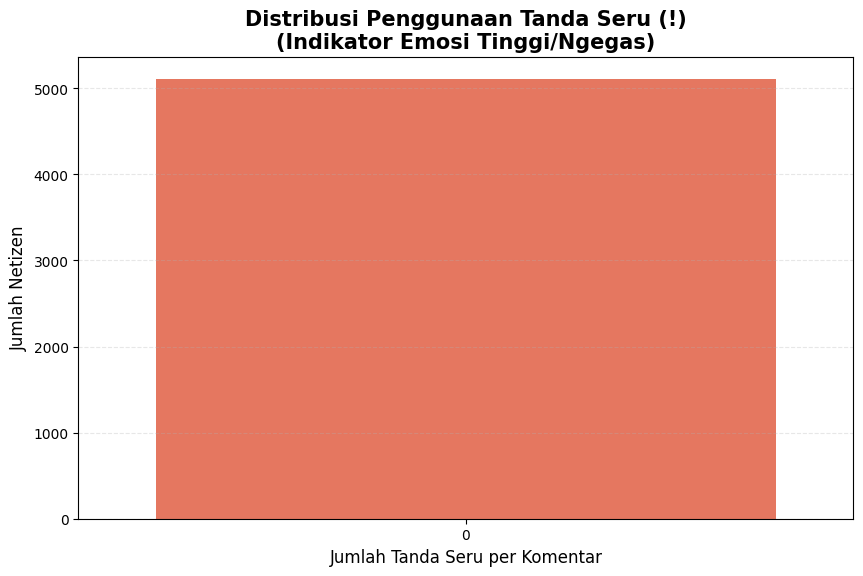


--- TOP 3 KOMENTAR PALING 'NGEGAS' (Banyak Tanda Seru) ---
- kamar jeri gemana klw konten kreator ga salah goblog orang gedein otot bgt paham ga bgt timoty buang krn fokusnya uang trus orang marah podcast deddy sakit hati bilang goblok ngapain orang bawa member ac rungkad bahas situ klw rungkad ya salah timoty ngasih tau koin beli beli tidak tergantung membernya terpenting timoty prof kalimasada bilang an persen beli nya bitcoin beli tebar jala keberuntungan koin rungkad teramat beli spot jgn future future judi salah prediksi ya nol habis modal pinter pinter jgn percaya seratus persen klw modal jgn treding bitcoin harga harganya
- kuduga si bacot timothy
- logika orang kaya ngajak orang kaya tingkat kesuksesan bermain kripto ruja ignatofa bolckchain nya fiktif memfaatkan membernya bahan kekayaan tr memfaatkan membernya membuka kelas member jt dibodohin korbannya kalangan gen z slogannya anak muda kesuksesannya beli wau hebat

Interpretasi:
- Jika grafik condong ke kiri (0): Diskusi be

In [116]:
#ungsi hitung tanda seru (Urgency/Anger)
def count_exclamation(text):
    return str(text).count('!')

if 'Clean_Comment' in df.columns:
    # Hitung jumlah tanda seru
    df['Exclamation_Count'] = df['Clean_Comment'].apply(count_exclamation)
    
    # Visualisasi Tanda Seru
    plt.figure(figsize=(10, 6))
    
    # --- PERBAIKAN DI SINI ---
    # Tambahkan hue=... dan legend=False biar warning hilang
    sns.countplot(
        x='Exclamation_Count', 
        hue='Exclamation_Count',  # <--- INI KUNCINYA
        data=df[df['Exclamation_Count'] <= 5], 
        palette='Reds',
        legend=False              # <--- INI JUGA PENTING
    )
    
    plt.title('Distribusi Penggunaan Tanda Seru (!)\n(Indikator Emosi Tinggi/Ngegas)', fontsize=15, fontweight='bold')
    plt.xlabel('Jumlah Tanda Seru per Komentar', fontsize=12)
    plt.ylabel('Jumlah Netizen', fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.3)
    plt.show()
    
    # Cek Komentar paling "Ngegas"
    print("\n--- TOP 3 KOMENTAR PALING 'NGEGAS' (Banyak Tanda Seru) ---")
    ngegas_df = df.sort_values(by='Exclamation_Count', ascending=False).head(3)
    for txt in ngegas_df['Clean_Comment']:
        print(f"- {txt}")

else:
    print("Kolom text tidak ditemukan.")

print("\nInterpretasi:")
print("- Jika grafik condong ke kiri (0): Diskusi berjalan tenang/datar.")
print("- Jika banyak di kanan (>2): Netizen sangat emosional (Marah/Excited).")

### D.8 SOCIAL ENTITY MINING

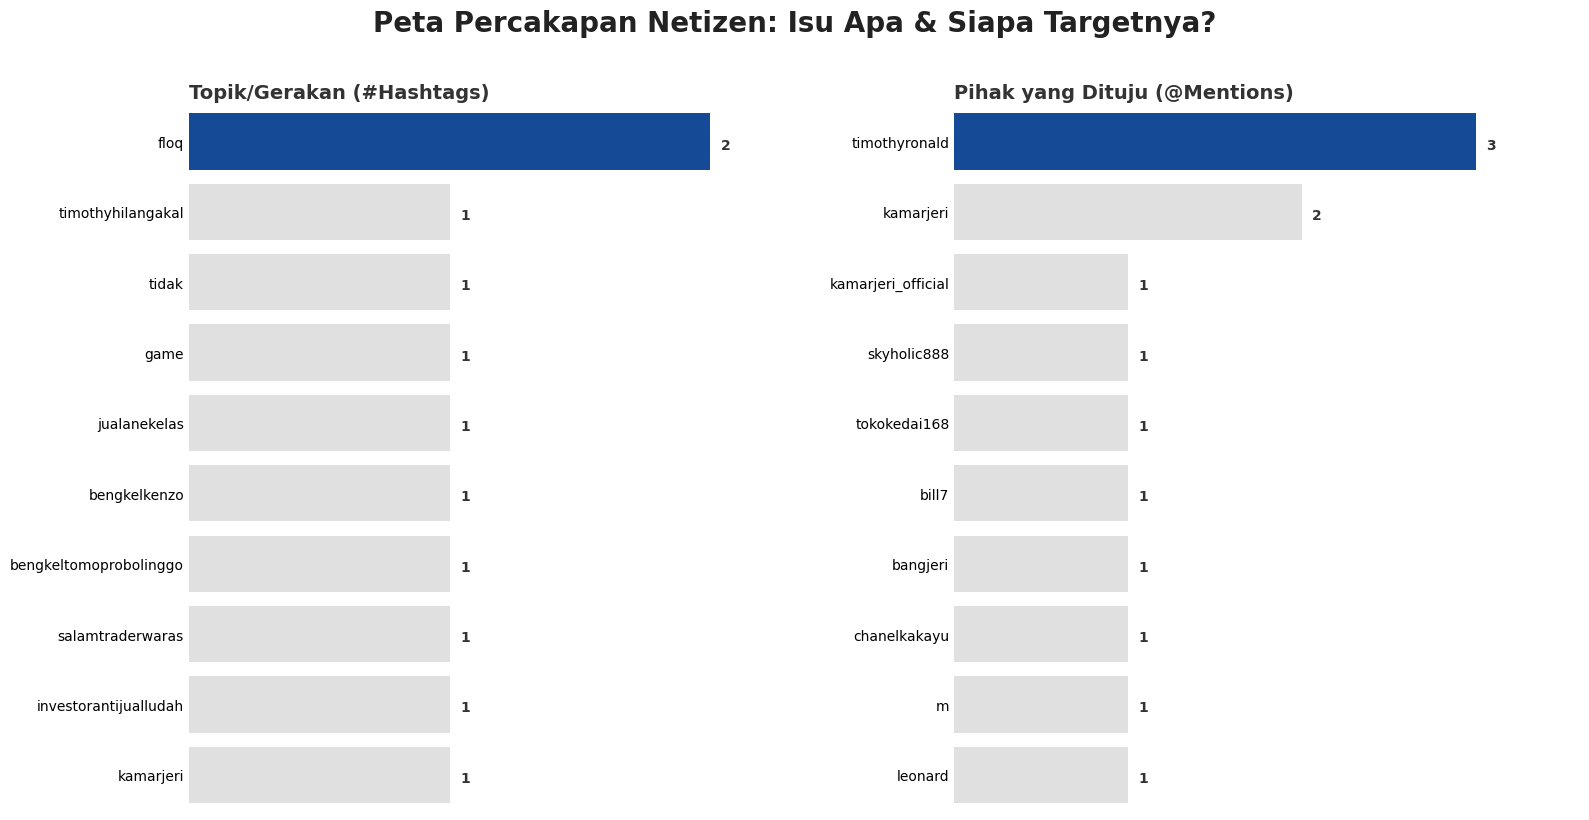

In [117]:
# DATA PREP 
target_text_col = 'Comment' 

def extract_patterns(text, pattern):
    return re.findall(pattern, str(text).lower())

all_hashtags = []
all_mentions = []
for doc in df[target_text_col]:
    all_hashtags.extend(extract_patterns(doc, r"#(\w+)"))
    all_mentions.extend(extract_patterns(doc, r"@(\w+)"))

hashtag_counts = pd.Series(all_hashtags).value_counts().head(10)
mention_counts = pd.Series(all_mentions).value_counts().head(10)

# STORYTELLING VISUALIZATION 
# Setup Canvas: 1 Baris, 2 Kolom
fig, axes = plt.subplots(1, 2, figsize=(16, 8))

# Fungsi Bikin Warna (Highlight Top 1)
def get_colors(data_series):
    colors = ['#E0E0E0'] * len(data_series) # Abu-abu soft banget
    if len(colors) > 0:
        colors[0] = '#0047AB' # Biru Cobalt buat Juara 1
    return colors

# HASHTAG (GERAKAN) 
if len(hashtag_counts) > 0:
    ax1 = axes[0]
    sns.barplot(x=hashtag_counts.values, y=hashtag_counts.index, 
                ax=ax1, palette=get_colors(hashtag_counts), hue=hashtag_counts.index, legend=False)
    
    # Sub-Judul yang Njelasin Konteks
    ax1.set_title('Topik/Gerakan (#Hashtags)', fontsize=14, fontweight='bold', color='#333333', loc='left')
    
    # Direct Labeling (Biar gak usah liat sumbu bawah)
    max_h = max(hashtag_counts.values)
    ax1.set_xlim(0, max_h * 1.2) # Space kosong kanan
    for i, v in enumerate(hashtag_counts.values):
        ax1.text(v + (max_h*0.02), i + 0.1, str(v), color='#333333', fontweight='bold')
else:
    axes[0].text(0.5, 0.5, "Tidak ada Hashtag", ha='center')

# PLOT 
if len(mention_counts) > 0:
    ax2 = axes[1]
    sns.barplot(x=mention_counts.values, y=mention_counts.index, 
                ax=ax2, palette=get_colors(mention_counts), hue=mention_counts.index, legend=False)
    
    # Sub-Judul yang Njelasin Konteks
    ax2.set_title('Pihak yang Dituju (@Mentions)', fontsize=14, fontweight='bold', color='#333333', loc='left')
    
    # Direct Labeling
    max_m = max(mention_counts.values)
    ax2.set_xlim(0, max_m * 1.2)
    for i, v in enumerate(mention_counts.values):
        ax2.text(v + (max_m*0.02), i + 0.1, str(v), color='#333333', fontweight='bold')
else:
    axes[1].text(0.5, 0.5, "Tidak ada Mention", ha='center')

# 3. THE "STORY" HEADER (Chapter 7) 
# Ini yang bikin beda. Judul besar yang merangkum semuanya.
plt.suptitle('Peta Percakapan Netizen: Isu Apa & Siapa Targetnya?', 
             fontsize=20, fontweight='bold', color='#222222', y=1.02)

#  CLEAN UP LOOP (De-cluttering Chapter 3) 
for ax in axes:
    sns.despine(ax=ax, left=True, bottom=True) # Ilangin kotak border
    ax.set_xlabel(None)
    ax.set_ylabel(None)
    ax.set_xticks([]) # Hapus angka sumbu X
    ax.tick_params(axis='y', length=0) # Hapus strip sumbu Y

plt.tight_layout()
plt.show()

### D.9 EMOJI SEMANTICS ANALYSIS

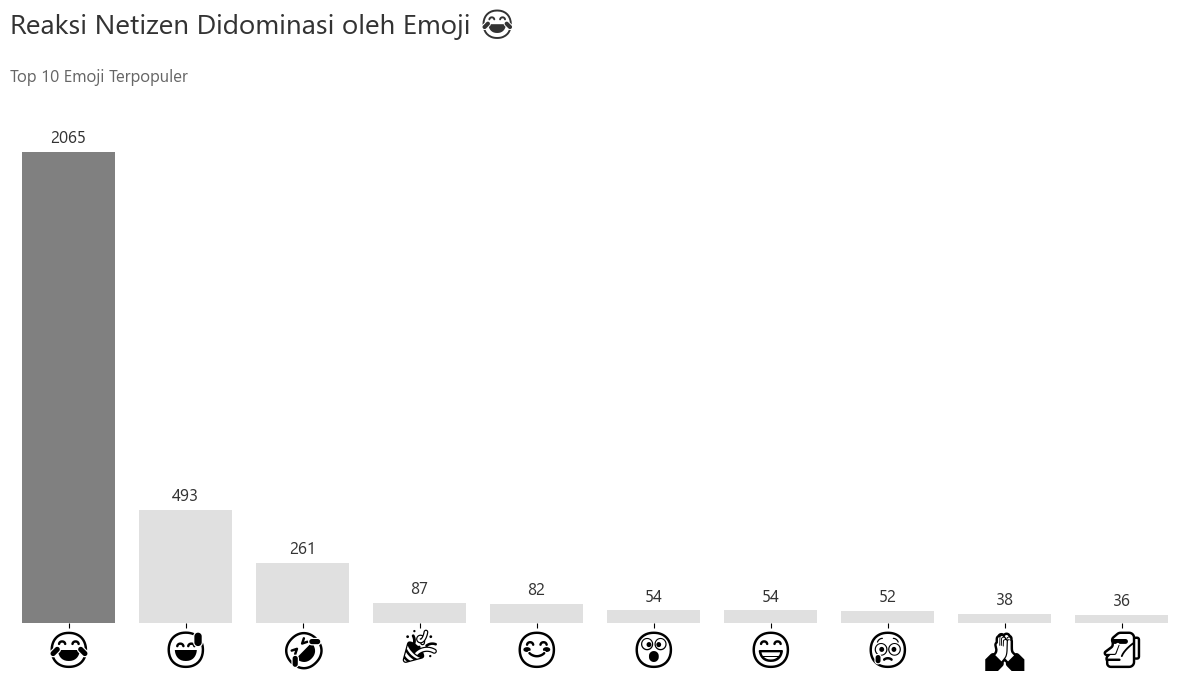

✅ Insight: Emoji 😂 adalah ekspresi paling dominan.


In [118]:
# Dengan ini, Matplotlib jadi tau cara gambar emoji.
# Karena dia tau, dia gak bakal ngeluarin warning "Glyph Missing".
plt.rcParams["font.family"] = "Segoe UI Emoji"

# --- 1. DATA PREP ---
target_text_col = 'Comment' # Ganti sesuai nama kolom lo
emoji_pattern = re.compile(r'[\U0001F000-\U0010FFFF]', flags=re.UNICODE)

all_emojis = []
# Pastikan kolom ada sebelum loop
if target_text_col in df.columns:
    for doc in df[target_text_col]:
        found = emoji_pattern.findall(str(doc)) 
        all_emojis.extend(found)

    # Cek ada emoji gak
    if len(all_emojis) > 0:
        # Ambil Top 10
        emoji_counts = pd.Series(all_emojis).value_counts().head(10)
        
        # VISUALISASI
        plt.figure(figsize=(12, 7))
        
        # Palet Warna Abu Soft
        bar_colors = ['#E0E0E0'] * len(emoji_counts)
        bar_colors[0] = '#808080' # Highlight Juara 1
        
        ax = sns.barplot(
            x=emoji_counts.index, 
            y=emoji_counts.values, 
            palette=bar_colors, 
            hue=emoji_counts.index, 
            legend=False
        )
        
        # --- JUDUL & STORYTELLING ---
        top_emoji = emoji_counts.index[0]
        total_unique = len(all_emojis)
        
        plt.text(x=-0.5, y=max(emoji_counts.values)*1.25, 
                 s=f'Reaksi Netizen Didominasi oleh Emoji {top_emoji}', 
                 fontsize=20, fontweight='bold', color='#333333')
        
        plt.text(x=-0.5, y=max(emoji_counts.values)*1.15, 
                 s=f'Top 10 Emoji Terpopuler', 
                 fontsize=12, color='#666666')
        
        # --- CLEAN LAYOUT ---
        sns.despine(left=True, bottom=True)
        plt.xlabel(None)
        plt.ylabel(None)
        plt.yticks([]) 
        
        # Ukuran Font Emoji Besar
        plt.xticks(fontsize=25) 
        
        # Label Angka Langsung di Bar
        for i, v in enumerate(emoji_counts.values):
            ax.text(i, v + (max(emoji_counts.values)*0.02), str(v), 
                    ha='center', fontweight='bold', color='#333333', fontsize=12)
            
        plt.tight_layout()
        plt.show()
        
        print(f"✅ Insight: Emoji {top_emoji} adalah ekspresi paling dominan.")
        
        # Balikin Font ke Normal (Opsional, biar chart lain gak pake font emoji)
        plt.rcParams["font.family"] = "sans-serif"

    else:
        print("❌ Tidak ada emoji ditemukan di kolom tersebut.")
else:
    print(f"❌ Kolom '{target_text_col}' tidak ditemukan di DataFrame.")

### D.10 CIRCULAR SEMANTIC NETWORK

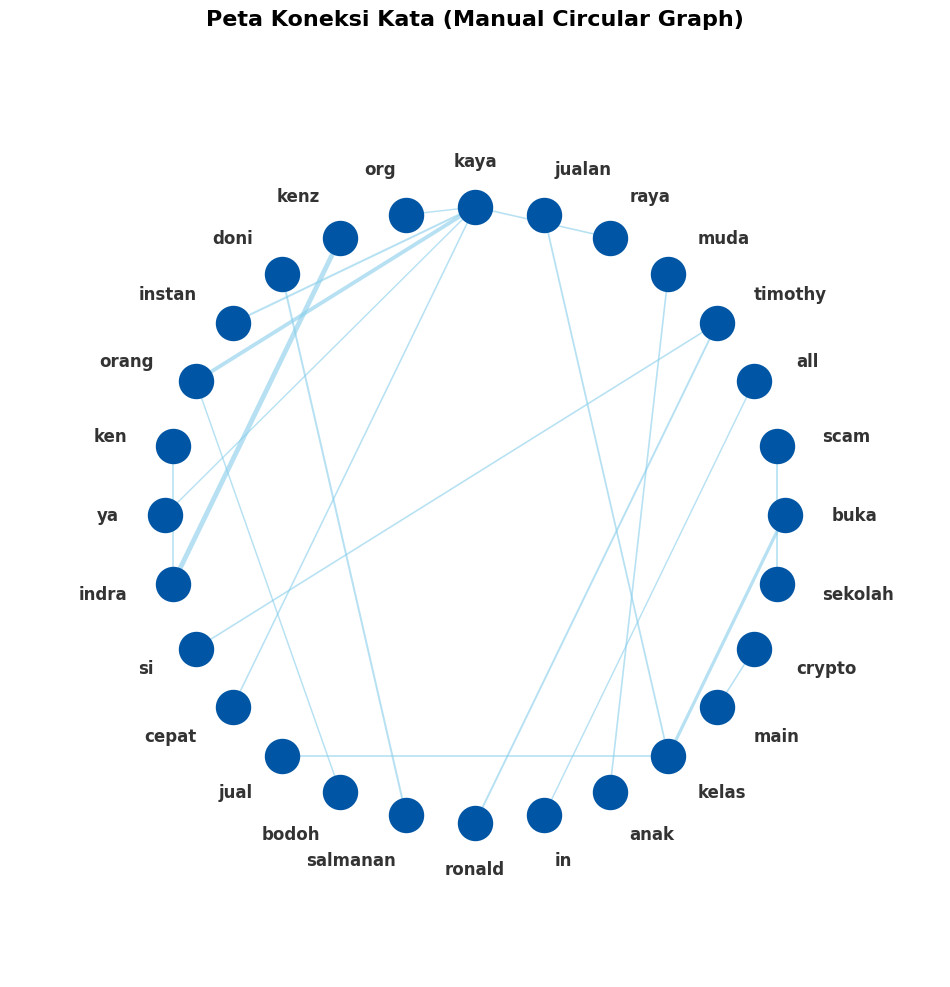

Interpretasi:
- Garis TEBAL = Kata yang sering banget muncul bareng.
- Kata yang punya BANYAK GARIS = Pusat pembicaraan (Central Topic).


In [119]:
#  SIAPKAN DATA BIGRAM (Top 20 Pasangan Kata)
def get_bigrams(text_series):
    bigrams = []
    for text in text_series:
        words = str(text).split()
        if len(words) > 1:
            for i in range(len(words)-1):
                bigrams.append((words[i], words[i+1]))
    return bigrams

all_bigrams = get_bigrams(df['Clean_Comment'])
bigram_counts = pd.Series(all_bigrams).value_counts().head(20) # Top 20

# SIAPKAN KOORDINAT 
edges_df = pd.DataFrame(bigram_counts).reset_index()
edges_df.columns = ['pair', 'weight']
edges_df['word1'] = edges_df['pair'].apply(lambda x: x[0])
edges_df['word2'] = edges_df['pair'].apply(lambda x: x[1])

# Ambil kata unik
unique_words = list(set(edges_df['word1']).union(set(edges_df['word2'])))
num_words = len(unique_words)

# Hitung sudut (0 sampai 360 derajat) buat tiap kata
angles = np.linspace(0, 2*np.pi, num_words, endpoint=False)
radius = 1.0

# Simpan koordinat (x, y) tiap kata
node_coords = {}
for i, word in enumerate(unique_words):
    x = radius * np.cos(angles[i])
    y = radius * np.sin(angles[i])
    node_coords[word] = (x, y)

# VISUALISASI 
plt.figure(figsize=(12, 12))

#  Gambar Garis Hubung 
max_weight = edges_df['weight'].max()
for _, row in edges_df.iterrows():
    w1, w2, w = row['word1'], row['word2'], row['weight']
    x1, y1 = node_coords[w1]
    x2, y2 = node_coords[w2]
    
    # Ketebalan garis berdasarkan frekuensi
    lw = (w / max_weight) * 3 + 0.5 
    # Gambar garis lurus antar titik
    plt.plot([x1, x2], [y1, y2], color='skyblue', alpha=0.6, linewidth=lw, zorder=1)

# Gambar Titik Kata (Nodes)
x_nodes = [node_coords[w][0] for w in unique_words]
y_nodes = [node_coords[w][1] for w in unique_words]
plt.scatter(x_nodes, y_nodes, s=600, color='#0055A4', zorder=2) # Titik biru besar

# Gambar Label Kata
for word, (x, y) in node_coords.items():
    # Dorong label agak keluar lingkaran (radius * 1.1) biar gak numpuk
    label_x = x * 1.15
    label_y = y * 1.15
    
    # Logika rata kiri/kanan biar rapi
    ha = 'left' if x > 0 else 'right'
    if -0.1 < x < 0.1: ha = 'center'
    
    plt.text(label_x, label_y, word, fontsize=12, fontweight='bold', 
             ha=ha, va='center', color='#333333')

# Final Touch
plt.title('Peta Koneksi Kata (Manual Circular Graph)', 
          fontsize=16, fontweight='bold', pad=20)
plt.axis('off') # Hapus kotak axis
plt.xlim(-1.5, 1.5) # Kasih margin biar label gak kepotong
plt.ylim(-1.5, 1.5)
plt.show()

print("Interpretasi:")
print("- Garis TEBAL = Kata yang sering banget muncul bareng.")
print("- Kata yang punya BANYAK GARIS = Pusat pembicaraan (Central Topic).")

 <a id="bab-e"></a>
 ## E. Data Preprocessing

### E.1 Text Normalization

In [120]:
# Kamus Normalisasi (Bisa lo tambahin sendiri)
norm_dict = {
    # Slang Umum
    'yg': 'yang', 'gk': 'tidak', 'gak': 'tidak', 'ga': 'tidak', 'nggak': 'tidak',
    'bgt': 'banget', 'dlm': 'dalam', 'krn': 'karena', 'tdk': 'tidak',
    'gw': 'saya', 'lu': 'kamu', 'lo': 'kamu', 'aku': 'saya', 'gua': 'saya',
    'sih': '', 'dong': '', 'deh': '', 'kok': '', # Stopwords gaul dibuang aja
    
    # Istilah Crypto/Finance
    'cuan': 'untung', 'profit': 'untung', 'boncos': 'rugi', 'loss': 'rugi',
    'wd': 'penarikan', 'depo': 'deposit', 'tp': 'ambil untung', 'cl': 'cut loss',
    'hold': 'tahan', 'serok': 'beli bawah', 'fud': 'berita negatif',
    'scam': 'penipuan', 'fraud': 'penipuan', 'bodong': 'penipuan'
}

def normalize_slang(text):
    words = str(text).lower().split()
    normalized_words = [norm_dict.get(word, word) for word in words]
    return ' '.join(normalized_words)

# Terapkan ke DataFrame
# Kita bikin kolom baru 'Final_Text' yang siap masuk mesin
df['Final_Text'] = df['Clean_Comment'].apply(normalize_slang)

print("✅ Normalisasi Selesai!")
print("Contoh Perubahan:")
print(df[['Clean_Comment', 'Final_Text']].sample(5))

✅ Normalisasi Selesai!
Contoh Perubahan:
                                      Clean_Comment  \
4742                              kripto judol gaya   
4367  lbh pcy ikuti berita dibahas ketimbang timoti   
1728                                   comen buzzer   
453                         antek timoty d komentar   
748               skypepek ngapain bahas ginian dah   

                                         Final_Text  
4742                              kripto judol gaya  
4367  lbh pcy ikuti berita dibahas ketimbang timoti  
1728                                   comen buzzer  
453                         antek timoty d komentar  
748               skypepek ngapain bahas ginian dah  


### E.2 Labeling

In [121]:
# Kamus Final (Update dari hasil EDA tadi)
pos_words = {'untung', 'bagus', 'keren', 'sukses', 'percaya', 'pintar', 'jujur', 
             'mantap', 'semangat', 'ilmu', 'paham', 'terima kasih', 'tahan', 
             'naik', 'gas', 'investasi', 'beli bawah', 'bulan'}

neg_words = {'penipuan', 'rugi', 'tipu', 'bohong', 'jelek', 'sampah', 'tolol', 
             'goblok', 'hancur', 'takut', 'ragu', 'judi', 'palsu', 'waspada', 
             'sepi', 'drama', 'berita negatif', 'turun', 'nyangkut'}

def get_sentiment_label(text):
    score = 0
    words = text.split()
    for w in words:
        if w in pos_words: score += 1
        elif w in neg_words: score -= 1
    
    # Thresholding
    if score > 0: return 'Positif'
    elif score < 0: return 'Negatif'
    else: return 'Netral'

# Apply Labeling
df['Sentiment'] = df['Final_Text'].apply(get_sentiment_label)

# Filter Hapus Netral (Opsional tapi Disarankan)
# Di Industri, biasanya kita cuma mau klasifikasi Positif vs Negatif biar model tajam
df_model = df[df['Sentiment'] != 'Netral'].copy()

# Encoding Label (Positif=1, Negatif=0)
# Mesin cuma ngerti angka
label_mapping = {'Positif': 1, 'Negatif': 0}
df_model['Label_Num'] = df_model['Sentiment'].map(label_mapping)

print("✅ Labeling Selesai!")
print(f"Total Data Siap Model: {len(df_model)}")
print(df_model['Sentiment'].value_counts())

✅ Labeling Selesai!
Total Data Siap Model: 1488
Sentiment
Positif    811
Negatif    677
Name: count, dtype: int64


### E.3 Split and Startified Split

In [122]:
x = df_model['Final_Text']
y = df_model['Label_Num']

In [123]:
def stratifed_split(x, y, train_size = 0.8, random_state = 42):
    np.random.seed(random_state)
    
    x_train_list, x_test_list = [], []
    y_train_list, y_test_list = [], []

    for class_value in np.unique(y): 
        class_idx = np.where(y == class_value)[0]
        
        idx = np.random.permutation(class_idx)
        split_ratio = int(len(idx) * train_size)

        x_train_list.append(x.iloc[idx[:split_ratio]])
        x_test_list.append(x.iloc[idx[split_ratio:]])
        y_train_list.append(y.iloc[idx[:split_ratio]])
        y_test_list.append(y.iloc[idx[split_ratio:]])

    x_train = pd.concat(x_train_list)
    x_test = pd.concat(x_test_list)
    y_train = pd.concat(y_train_list)
    y_test = pd.concat(y_test_list)
    
    train_idx = np.random.permutation(len(x_train))
    test_idx = np.random.permutation(len(x_test))
    
    x_train = x_train.iloc[train_idx].reset_index(drop=True)
    y_train = y_train.iloc[train_idx].reset_index(drop=True)
    x_test = x_test.iloc[test_idx].reset_index(drop=True)
    y_test = y_test.iloc[test_idx].reset_index(drop=True)

    return x_train, x_test, y_train, y_test
x_train, x_test, y_train, y_test = stratifed_split(x, y)

<a id="bab-f"></a>
## F. Modeling

### F.1 Out-Of-Vocabulary Aanalysis

--- LAPORAN AUDIT VOCABULARY ---
Total Kata Unik Train : 6063
Total Kata Unik Test  : 2395
Kata Asing (OOV)      : 901 kata
Model Coverage        : 62.38%


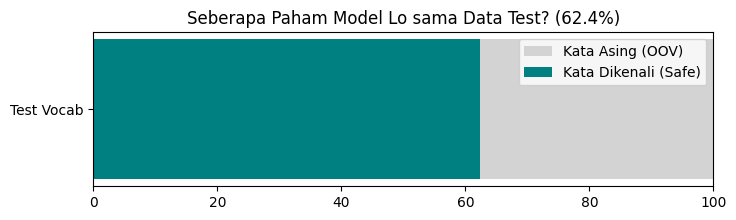

In [124]:
def audit_vocab_coverage(x_train, x_test):
    # 1. Pecah kalimat jadi set kata unik
    vocab_train = set(' '.join(x_train).split())
    vocab_test = set(' '.join(x_test).split())
    
    # 2. Hitung Irisan & Selisih
    common_words = vocab_train.intersection(vocab_test) # Kata yang model TAHU
    oov_words = vocab_test - vocab_train                # Kata yang model BUTA (Out of Vocab)
    
    # 3. Statistik
    coverage_pct = len(common_words) / len(vocab_test) * 100
    
    print(f"--- LAPORAN AUDIT VOCABULARY ---")
    print(f"Total Kata Unik Train : {len(vocab_train)}")
    print(f"Total Kata Unik Test  : {len(vocab_test)}")
    print(f"Kata Asing (OOV)      : {len(oov_words)} kata")
    print(f"Model Coverage        : {coverage_pct:.2f}%")
    
    # 4. Visualisasi Coverage 
    plt.figure(figsize=(8, 2))
    plt.barh(['Test Vocab'], [100], color='lightgray', label='Kata Asing (OOV)')
    plt.barh(['Test Vocab'], [coverage_pct], color='teal', label='Kata Dikenali (Safe)')
    
    plt.title(f'Seberapa Paham Model Lo sama Data Test? ({coverage_pct:.1f}%)')
    plt.legend()
    plt.xlim(0, 100)
    plt.show()

    # Cek apakah kata krusial hilang
    if 'boncos' in oov_words:
        print("⚠️ BAHAYA: Kata 'boncos' ada di Test tapi TIDAK ADA di Train. Model bakal bingung!")
    elif 'boncos' in common_words:
        print("✅ AMAN: Kata 'boncos' dipelajari di Train dan muncul di Test.")

# Panggil fungsinya
audit_vocab_coverage(x_train, x_test)

### F.2 Naive Baiyess Multinomial 

### Naive Baiyes Modeling

In [125]:
def train_naive_bayes(x_train, y_train, k=0.75): # <--- Perubahan 1: Tambah parameter k (default 0.5)
    """
    Melatih model Naive Bayes dengan parameter k yang bisa di-tuning.
    """
    # 1. GABUNGKAN DATA
    df = pd.DataFrame({'text': x_train, 'label': y_train})
    
    # 2. HITUNG PRIOR
    class_counts = df['label'].value_counts(normalize=True)
    prior_pos = np.log(class_counts.get(1, 1e-10))
    prior_neg = np.log(class_counts.get(0, 1e-10))
    
    # 3. PISAHKAN TEKS
    text_pos = ' '.join(df[df['label'] == 1]['text'].astype(str)).split()
    text_neg = ' '.join(df[df['label'] == 0]['text'].astype(str)).split()
    
    # 4. SENSUS KATA
    freq_pos = pd.Series(text_pos).value_counts()
    freq_neg = pd.Series(text_neg).value_counts()
    
    vocab_df = pd.DataFrame({'n_pos': freq_pos, 'n_neg': freq_neg})
    vocab_df.fillna(0, inplace=True)
    
    # 5. HITUNG PROBABILITAS (Modeling) dengan Variabel k
    n_total_pos = len(text_pos) 
    n_total_neg = len(text_neg) 
    vocab_size = len(vocab_df)
    
    # --- Perubahan 2: Ganti angka 1 jadi k ---
    # Rumus Joel Grus: (count + k) / (total_count + 2*k)
    # Tapi kalau pembaginya Total Vocab (bukan total count), rumusnya:
    # (count + k) / (total_count + k * vocab_size)
    
    vocab_df['prob_pos'] = (vocab_df['n_pos'] + k) / (n_total_pos + (k * vocab_size))
    vocab_df['prob_neg'] = (vocab_df['n_neg'] + k) / (n_total_neg + (k * vocab_size))
    
    # 6. LOG TRICK
    vocab_df['log_prob_pos'] = np.log(vocab_df['prob_pos'])
    vocab_df['log_prob_neg'] = np.log(vocab_df['prob_neg'])
    
    return {
        'vocab': vocab_df,
        'prior_pos': prior_pos,
        'prior_neg': prior_neg
    }

### Grid Search

🔧 MEMULAI HYPERTUNING (Mencoba 6 variasi k)...
   👉 Coba k=0.1 | Akurasi: 83.61%
   👉 Coba k=0.5 | Akurasi: 88.29%
   👉 Coba k=1.0 | Akurasi: 89.63%
   👉 Coba k=1.5 | Akurasi: 90.64%
   👉 Coba k=2.0 | Akurasi: 89.97%
   👉 Coba k=5.0 | Akurasi: 85.28%

🏆 PEMENANG: k = 1.5 dengan Akurasi 90.64%


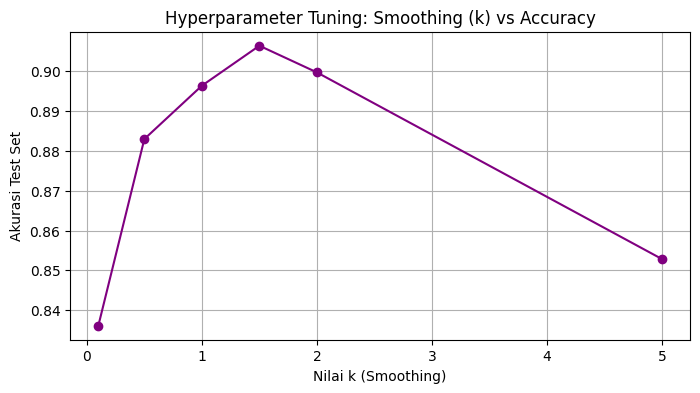

In [126]:
def grid_search_tuning(x_train, y_train, x_test, y_test, k_options):
    """
    Mencari nilai k (Smoothing) terbaik dengan cara brute-force loop.
    """
    print(f"🔧 MEMULAI HYPERTUNING (Mencoba {len(k_options)} variasi k)...")
    
    best_k = 0
    best_acc = 0
    history = []
    
    for k in k_options:
        # 1. Train Model dengan k tertentu
        # (Kita panggil fungsi training yang udah kita bikin sebelumnya)
        model = train_naive_bayes(x_train, y_train, k=k) # Pastikan fungsi ini nerima parameter k
        
        # 2. Predict ke Data Test
        # (Kita butuh fungsi predict sederhana di sini)
        correct = 0
        total = len(x_test)
        
        # Ambil "Otak" model
        vocab_df = model['vocab']
        prior_pos = model['prior_pos']
        prior_neg = model['prior_neg']
        
        # Loop Prediksi Cepat
        for text, label_asli in zip(x_test, y_test):
            words = str(text).split()
            
            # Filter kata yg ada di vocab
            valid_words = [w for w in words if w in vocab_df.index]
            
            if not valid_words:
                pred = 1 if prior_pos > prior_neg else 0
            else:
                # Ambil probabilitas
                w_probs = vocab_df.loc[valid_words]
                score_pos = prior_pos + w_probs['log_prob_pos'].sum()
                score_neg = prior_neg + w_probs['log_prob_neg'].sum()
                pred = 1 if score_pos > score_neg else 0
            
            if pred == label_asli:
                correct += 1
        
        # 3. Hitung Akurasi
        acc = correct / total
        history.append((k, acc))
        print(f"   👉 Coba k={k} | Akurasi: {acc*100:.2f}%")
        
        if acc > best_acc:
            best_acc = acc
            best_k = k
            
    print(f"\n🏆 PEMENANG: k = {best_k} dengan Akurasi {best_acc*100:.2f}%")
    return best_k, history

# --- EKSEKUSI ---
# Kita coba variasi k dari yang sangat kecil sampai besar
# k=0.1 (Pelit) sampai k=2.0 (Murah Hati)
list_k = [0.1, 0.5, 1.0, 1.5, 2.0, 5.0]

best_k_found, history_tuning = grid_search_tuning(x_train, y_train, x_test, y_test, list_k)

# Visualisasi Hasil Tuning
k_vals = [h[0] for h in history_tuning]
acc_vals = [h[1] for h in history_tuning]

plt.figure(figsize=(8, 4))
plt.plot(k_vals, acc_vals, marker='o', linestyle='-', color='purple')
plt.title('Hyperparameter Tuning: Smoothing (k) vs Accuracy')
plt.xlabel('Nilai k (Smoothing)')
plt.ylabel('Akurasi Test Set')
plt.grid(True)
plt.show()

<a id="bab-g"></a>
## G. Evaluasi 

### G.1 Classification Report

In [127]:
def evaluate_model_performance(model, x_test, y_test):
    print("📊 SEDANG MENGHITUNG METRICS MANUAL...")
    
    # 1. AMBIL PREDIKSI DARI MODEL TERBAIK (k=1.5)
    # Kita bongkar dulu isi modelnya
    vocab = model['vocab']
    prior_pos = model['prior_pos']
    prior_neg = model['prior_neg']
    
    y_pred = []
    
    # Loop Prediksi Manual (Vectorized Thinking)
    for text in x_test:
        words = str(text).split()
        valid_words = [w for w in words if w in vocab.index]
        
        if not valid_words:
            # Kalau bingung, pakai tebakan mayoritas (Prior)
            y_pred.append(1 if prior_pos > prior_neg else 0)
            continue
            
        # Sum Log Probabilities
        w_probs = vocab.loc[valid_words]
        score_pos = prior_pos + w_probs['log_prob_pos'].sum()
        score_neg = prior_neg + w_probs['log_prob_neg'].sum()
        
        y_pred.append(1 if score_pos > score_neg else 0)
    
    # 2. HITUNG CONFUSION MATRIX (Tanpa Sklearn)
    tp = 0; fp = 0; fn = 0; tn = 0
    
    for real, pred in zip(y_test, y_pred):
        if real == 1 and pred == 1: tp += 1
        elif real == 0 and pred == 1: fp += 1 # Salah Tuduh (Haters dibilang Fans)
        elif real == 1 and pred == 0: fn += 1 # Kecolongan (Fans dibilang Haters)
        elif real == 0 and pred == 0: tn += 1
        
    # 3. HITUNG RUMUS JOEL GRUS (Bab 11)
    # Precision = TP / (TP + FP) -> Seberapa akurat pas bilang "Positif"?
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    
    # Recall = TP / (TP + FN) -> Seberapa jago nangkep Positif yg ngumpet?
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    
    # F1-Score = Rata-rata harmonis (biar adil)
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0
    
    accuracy = (tp + tn) / len(y_test)

    # 4. TAMPILKAN LAPORAN
    print("\n" + "="*40)
    print(f"📈 LAPORAN PERFORMA MODEL (k=1.5)")
    print("="*40)
    print(f"Akurasi   : {accuracy*100:.2f}%")
    print(f"Precision : {precision*100:.2f}%  <-- Kualitas Tebakan Positif")
    print(f"Recall    : {recall*100:.2f}%  <-- Daya Tangkap Positif")
    print(f"F1-Score  : {f1*100:.2f}%")
    print("-" * 40)
    print("PETA KESALAHAN (CONFUSION MATRIX):")
    print(f"                 [Prediksi Pos]   [Prediksi Neg]")
    print(f"[Asli Positif]   {tp:<15}  {fn} (Meleset)")
    print(f"[Asli Negatif]   {fp:<15}  {tn}")
    print("="*40)
    
    # Insight Otomatis
    if fp > fn:
        print("⚠️ INSIGHT: Model lo 'OVER-OPTIMIS'.")
        print("   Dia sering salah nyangka Haters sebagai Fans (FP Tinggi).")
        print("   Saran: Coba naikkan Threshold (jangan cuma > 50%).")
    elif fn > fp:
        print("⚠️ INSIGHT: Model lo 'PESIMIS/HATI-HATI'.")
        print("   Dia sering kelewatan nangkep Fans (FN Tinggi).")
        print("   Saran: Coba turunkan Threshold atau tambah kata kunci Positif.")
    else:
        print("✅ INSIGHT: Model lo Seimbang!")

# EKSEKUSI (Pastikan best_model_found dari tahap sebelumnya ada)
# Kalau belum ada, train ulang dulu:
best_model_k15 = train_naive_bayes(x_train, y_train, k=1.5) 
evaluate_model_performance(best_model_k15, x_test, y_test)

📊 SEDANG MENGHITUNG METRICS MANUAL...

📈 LAPORAN PERFORMA MODEL (k=1.5)
Akurasi   : 90.64%
Precision : 88.14%  <-- Kualitas Tebakan Positif
Recall    : 95.71%  <-- Daya Tangkap Positif
F1-Score  : 91.76%
----------------------------------------
PETA KESALAHAN (CONFUSION MATRIX):
                 [Prediksi Pos]   [Prediksi Neg]
[Asli Positif]   156              7 (Meleset)
[Asli Negatif]   21               115
⚠️ INSIGHT: Model lo 'OVER-OPTIMIS'.
   Dia sering salah nyangka Haters sebagai Fans (FP Tinggi).
   Saran: Coba naikkan Threshold (jangan cuma > 50%).


### G.2 Sanity Check

In [128]:
def inspect_model_logic(model, top_n=10):
    vocab = model['vocab']
    
    # Ambil Kata Paling "Hate Speech" (Probabilitas Negatif Tinggi)
    # Kita urutkan berdasarkan Log Prob Negatif
    top_negative = vocab.sort_values('log_prob_neg', ascending=False).head(top_n)
    
    # Ambil Kata Paling "Support" (Probabilitas Positif Tinggi)
    top_positive = vocab.sort_values('log_prob_pos', ascending=False).head(top_n)
    
    print(f"--- 🧠 ISI OTAK MODEL (Sanity Check) ---")
    print(f"\nTop {top_n} Indikator NEGATIF (Haters):")
    print(top_negative[['n_neg', 'log_prob_neg']])
    
    print(f"\nTop {top_n} Indikator POSITIF (Fans):")
    print(top_positive[['n_pos', 'log_prob_pos']])
    
    print("\n🧐 ANALISIS MENTOR:")
    print("1. Cek apakah ada kata sambung (di, yang, dan)? Kalau ada, bersihin lagi Stopwords lo.")
    print("2. Cek apakah ada nama orang (timothy)? Hati-hati bias personal.")
    print("3. Cek apakah kata 'Negatif' beneran berkonotasi buruk?")

# Panggil fungsi ini
inspect_model_logic(best_model_k15)

--- 🧠 ISI OTAK MODEL (Sanity Check) ---

Top 10 Indikator NEGATIF (Haters):
          n_neg  log_prob_neg
tidak     273.0     -4.269787
orang     212.0     -4.521101
penipuan  191.0     -4.624642
nya       156.0     -4.825312
kaya      145.0     -4.897712
crypto    142.0     -4.918403
saya      118.0     -5.101421
timothy   114.0     -5.135467
rugi      112.0     -5.152935
goblok    103.0     -5.235551

Top 10 Indikator POSITIF (Fans):
           n_pos  log_prob_pos
tidak      595.0     -3.805917
orang      360.0     -4.306734
saya       270.0     -4.593034
kaya       258.0     -4.638240
untung     240.0     -4.710127
nya        232.0     -4.743814
percaya    203.0     -4.876428
crypto     202.0     -4.881330
investasi  161.0     -5.106318
kelas      142.0     -5.230661

🧐 ANALISIS MENTOR:
1. Cek apakah ada kata sambung (di, yang, dan)? Kalau ada, bersihin lagi Stopwords lo.
2. Cek apakah ada nama orang (timothy)? Hati-hati bias personal.
3. Cek apakah kata 'Negatif' beneran berkonotas

### G.3 Get Predictions

In [132]:
# --- 1. Fungsi Helper (Alat Bantu Prediksi) ---
def get_predictions(model, x_data):
    preds = []
    vocab = model['vocab']
    prior_pos, prior_neg = model['prior_pos'], model['prior_neg']
    
    for text in x_data:
        words = str(text).split()
        valid_words = [w for w in words if w in vocab.index]
        
        if not valid_words:
            preds.append(1 if prior_pos > prior_neg else 0)
            continue
            
        w_probs = vocab.loc[valid_words]
        score_pos = prior_pos + w_probs['log_prob_pos'].sum()
        score_neg = prior_neg + w_probs['log_prob_neg'].sum()
        
        preds.append(1 if score_pos > score_neg else 0)
    return preds

# --- 2. Fungsi Diagnosa (Dokter Model) ---
def diagnose_bias_variance(model, x_train, y_train, x_test, y_test):
    print("🏥 SEDANG MEMERIKSA KESEHATAN MODEL...")
    
    # Hitung Akurasi di Data Latih
    pred_train = get_predictions(model, x_train)
    acc_train = sum([1 for p, t in zip(pred_train, y_train) if p == t]) / len(y_train)
    
    # Hitung Akurasi di Data Uji
    pred_test = get_predictions(model, x_test)
    acc_test = sum([1 for p, t in zip(pred_test, y_test) if p == t]) / len(y_test)
    
    print(f"\n--- HASIL DIAGNOSA ---")
    print(f"📚 Akurasi Training : {acc_train*100:.2f}%")
    print(f"🎓 Akurasi Testing  : {acc_test*100:.2f}%")
    print(f"⚠️ Selisih (Gap)    : {(acc_train - acc_test)*100:.2f}%")
    
    # Logika Resep Dokter
    if acc_train > 0.95 and acc_test < 0.70:
        print("\nPenyakit: OVERFITTING (High Variance).")
    elif acc_train < 0.70 and acc_test < 0.70:
        print("\nPenyakit: UNDERFITTING (High Bias).")
    else:
        print("\nStatus: SEHAT (Good Fit). Model siap tempur!")

# --- 3. EKSEKUSI UTAMA (Main Program) ---
print("🚀 Memulai Proses Training & Evaluasi...")

# A. Train Model Terbaik (Kita bikin variabel global biar bisa dipake di mana aja)
best_model_k15 = train_naive_bayes(x_train, y_train, k=1.5)

# B. Panggil Dokter (Diagnosa Bias-Variance)
diagnose_bias_variance(best_model_k15, x_train, y_train, x_test, y_test)

# C. Siapkan Data buat Plotting (Ini yang bikin error tadi)
# Kita simpan di variabel global 'y_pred_final'
y_pred_final = get_predictions(best_model_k15, x_test)

print("✅ Selesai! Variabel 'best_model_k15' dan 'y_pred_final' sudah siap.")

🚀 Memulai Proses Training & Evaluasi...
🏥 SEDANG MEMERIKSA KESEHATAN MODEL...

--- HASIL DIAGNOSA ---
📚 Akurasi Training : 99.33%
🎓 Akurasi Testing  : 90.64%
⚠️ Selisih (Gap)    : 8.69%

Status: SEHAT (Good Fit). Model siap tempur!
✅ Selesai! Variabel 'best_model_k15' dan 'y_pred_final' sudah siap.


### G.4 Log-Odds Distribution

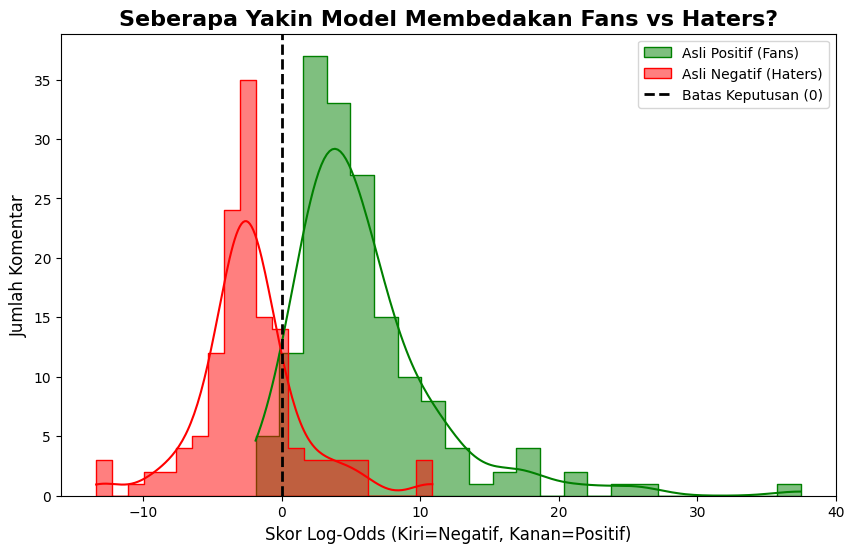

In [ ]:
def get_model_scores(model, x_data):
    """
    Fungsi ini gak cuma balikin 0/1, tapi balikin SKOR KEYAKINAN (Log Ratio).
    Positif = Skor > 0
    Negatif = Skor < 0
    """
    scores = []
    vocab = model['vocab']
    prior_pos = model['prior_pos']
    prior_neg = model['prior_neg']
    
    for text in x_data:
        words = str(text).split()
        valid_words = [w for w in words if w in vocab.index]
        
        if not valid_words:
            scores.append(0) # Netral/Bingung
            continue
            
        w_probs = vocab.loc[valid_words]
        
        # Total Log Probabilitas
        score_pos = prior_pos + w_probs['log_prob_pos'].sum()
        score_neg = prior_neg + w_probs['log_prob_neg'].sum()
        
        # Log Odds Ratio (Selisih)
        scores.append(score_pos - score_neg)
        
    return np.array(scores)

def plot_confidence_distribution(model, x_test, y_test):
    # 1. Ambil Skor Mentah
    scores = get_model_scores(model, x_test)
    
    # 2. Pisahkan Skor berdasarkan Label Asli
    scores_asli_pos = scores[y_test == 1] # Skor dari data yang EMANG Positif
    scores_asli_neg = scores[y_test == 0] # Skor dari data yang EMANG Negatif
    
    # 3. Plot Histogram
    plt.figure(figsize=(10, 6))
    
    # Histogram Positif (Warna Hijau)
    sns.histplot(scores_asli_pos, color='green', label='Asli Positif (Fans)', kde=True, element="step", alpha=0.5)
    
    # Histogram Negatif (Warna Merah)
    sns.histplot(scores_asli_neg, color='red', label='Asli Negatif (Haters)', kde=True, element="step", alpha=0.5)
    
    # Garis Batas Keputusan (Threshold 0)
    plt.axvline(0, color='black', linestyle='--', linewidth=2, label='Batas Keputusan (0)')
    
    plt.title('Seberapa Yakin Model Membedakan Fans vs Haters?', fontsize=16, fontweight='bold')
    plt.xlabel('Skor Log-Odds (Kiri=Negatif, Kanan=Positif)', fontsize=12)
    plt.ylabel('Jumlah Komentar', fontsize=12)
    plt.legend()
    plt.show()

# PANGGIL FUNGSINYA
plot_confidence_distribution(best_model_k15, x_test, y_test)

### G.5 Confusion Matrix Plot

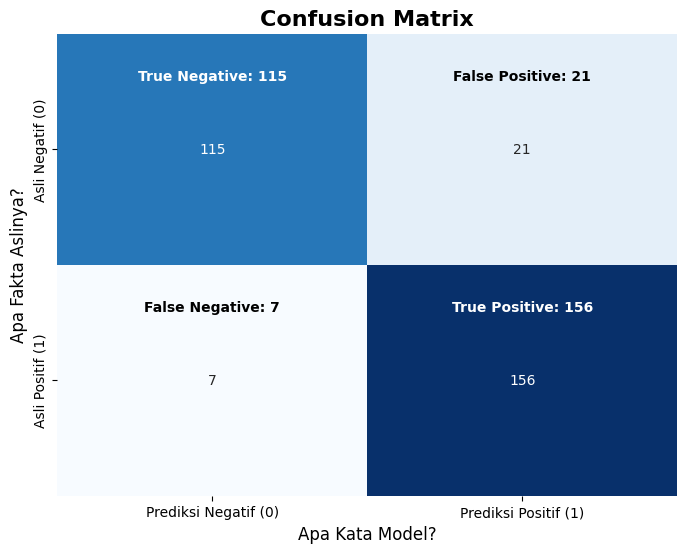

In [137]:
def plot_confusion_matrix_manual(y_true, y_pred):
    # 1. HITUNG MANUAL (Gantiin sklearn.metrics.confusion_matrix)
    # Kita siapin 4 ember kosong
    tp = 0 # True Positive
    fp = 0 # False Positive
    fn = 0 # False Negative
    tn = 0 # True Negative
    
    # Konversi ke array biar aman kalau index-nya beda
    y_true_arr = np.array(y_true)
    y_pred_arr = np.array(y_pred)
    
    # Loop Sensus (O(N))
    for real, pred in zip(y_true_arr, y_pred_arr):
        if real == 1 and pred == 1: tp += 1
        elif real == 0 and pred == 1: fp += 1
        elif real == 1 and pred == 0: fn += 1
        elif real == 0 and pred == 0: tn += 1
        
    # 2. SUSUN MATRIKS (Array 2x2)
    # Format Standar Heatmap: 
    # Baris (Y) = Asli, Kolom (X) = Prediksi
    # [ [TN, FP],   <-- Baris Asli Negatif
    #   [FN, TP] ]  <-- Baris Asli Positif
    matrix = [[tn, fp], 
              [fn, tp]]
              
    # 3. VISUALISASI
    plt.figure(figsize=(8, 6))
    
    # Seaborn nerima list-of-lists biasa kok, gak harus DataFrame
    sns.heatmap(matrix, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=['Prediksi Negatif (0)', 'Prediksi Positif (1)'],
                yticklabels=['Asli Negatif (0)', 'Asli Positif (1)'])
    
    # Kosmetik
    plt.title('Confusion Matrix', fontsize=16, fontweight='bold')
    plt.xlabel('Apa Kata Model?', fontsize=12)
    plt.ylabel('Apa Fakta Aslinya?', fontsize=12)
    
    # Tambahin detail teks biar makin informatif
    plt.text(0.5, 0.2, f"True Negative: {tn}", ha='center', color='white', fontweight='bold')
    plt.text(1.5, 0.2, f"False Positive: {fp}", ha='center', color='black', fontweight='bold')
    plt.text(0.5, 1.2, f"False Negative: {fn}", ha='center', color='black', fontweight='bold')
    plt.text(1.5, 1.2, f"True Positive: {tp}", ha='center', color='white', fontweight='bold')
    
    plt.show()

# PANGGIL FUNGSINYA
plot_confusion_matrix_manual(y_test, y_pred_final)

### G.6 Roc Auc

📈 SEDANG MEMBANGUN ROC CURVE (MANUAL)...


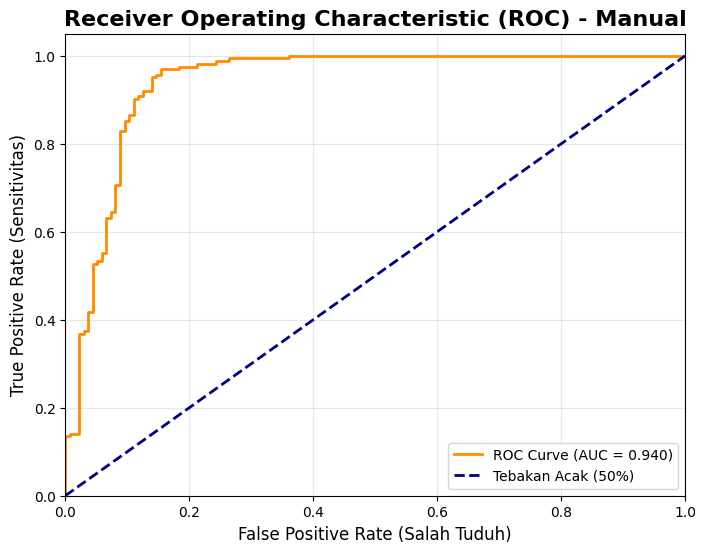

🏆 AUC Score: 0.940
Grade: A (Sangat Bagus)


In [138]:
def generate_roc_curve_manual(model, x_test, y_test):
    print("📈 SEDANG MEMBANGUN ROC CURVE (MANUAL)...")
    
    # 1. AMBIL SKOR KEYAKINAN (Log Odds)
    # Kita butuh skor mentah, bukan prediksi 0/1
    # Skor > 0 (Positif), Skor < 0 (Negatif)
    scores = get_model_scores(model, x_test) # Fungsi yang udah kita bikin di tahap visualisasi
    
    # 2. URUTKAN SKOR DARI TINGGI KE RENDAH
    # Tujuannya biar kita bisa bikin "Moving Threshold"
    # Kita gabungin skor sama label aslinya dulu
    data = sorted(zip(scores, y_test), key=lambda x: x[0], reverse=True)
    sorted_scores = [d[0] for d in data]
    sorted_labels = [d[1] for d in data]
    
    # 3. HITUNG TPR & FPR DI SETIAP TITIK
    tpr_list = [0] # Titik awal (0,0)
    fpr_list = [0]
    
    # Total Positif & Negatif Asli (Buat Pembagi)
    P_total = sum(y_test)
    N_total = len(y_test) - P_total
    
    TP_current = 0
    FP_current = 0
    
    # Loop Sisir (Sweeping)
    # Ini trik optimasi: Daripada loop threshold, kita loop datanya satu-satu
    for i in range(len(sorted_labels)):
        if sorted_labels[i] == 1:
            TP_current += 1 # Nemu Positif beneran
        else:
            FP_current += 1 # Nemu Negatif (salah tuduh jadi Positif)
            
        # Hitung Rate saat ini
        tpr = TP_current / P_total
        fpr = FP_current / N_total
        
        tpr_list.append(tpr)
        fpr_list.append(fpr)
        
    # 4. HITUNG AUC (Area Under Curve) - Pake Rumus Trapesium
    auc = 0
    for i in range(1, len(fpr_list)):
        # Luas = (Alas) * (Tinggi Rata2)
        alas = fpr_list[i] - fpr_list[i-1]
        tinggi = (tpr_list[i] + tpr_list[i-1]) / 2
        auc += alas * tinggi
        
    # 5. VISUALISASI
    plt.figure(figsize=(8, 6))
    plt.plot(fpr_list, tpr_list, color='darkorange', lw=2, label=f'ROC Curve (AUC = {auc:.3f})')
    plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--', label='Tebakan Acak (50%)')
    
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate (Salah Tuduh)', fontsize=12)
    plt.ylabel('True Positive Rate (Sensitivitas)', fontsize=12)
    plt.title('Receiver Operating Characteristic (ROC) - Manual', fontsize=16, fontweight='bold')
    plt.legend(loc="lower right")
    plt.grid(alpha=0.3)
    plt.show()
    
    print(f"🏆 AUC Score: {auc:.3f}")
    if auc > 0.9: print("Grade: A (Sangat Bagus)")
    elif auc > 0.8: print("Grade: B (Bagus)")
    elif auc > 0.7: print("Grade: C (Lumayan)")
    else: print("Grade: D (Model Bingung)")

# PANGGIL FUNGSINYA
generate_roc_curve_manual(best_model_k15, x_test, y_test)